In [1]:
import numpy as np
import pandas as pd
import pandas
# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Regression
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pydotplus

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices

import scipy.stats 
import random

import plotly.plotly as py
import plotly.graph_objs as go


import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import skew

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.gridspec as gridspec

from scipy.stats import zscore

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [2]:
hour_df = pd.read_csv('hour.csv')
print(hour_df.shape)

(17379, 17)


In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


The data is consisting of bike usage inbetween the years 2011 and 2012

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Data Preprocessing

In [6]:
# Renaming columns names to more readable names
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime',
                        'holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity',
                        'mnth':'month','cnt':'total_count','hr':'hour',
                        'yr':'year'},inplace=True)

### change of data types

In [7]:
# converting to datetime
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

In [8]:
# converting to category dtype 
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [9]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hour_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df['total_count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: total_count, dtype: float64

By above we conclude that total_count ranges between 1(min) and 977(max) which means each hour has seen a minimum of 1 bike rental to max of 977 bike rentals that good right.

Average rent count - 189.5 as we are dealing with continuous numerical variables where linear regression is the right choice to train and predict rental count

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,1,'distribution of counts in weekdays')]

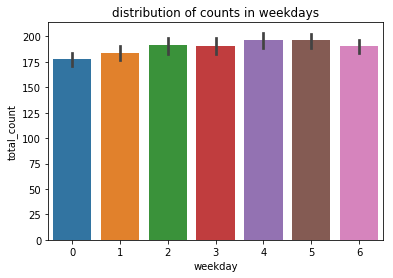

In [12]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['weekday',
                           'total_count']],
              x='weekday',
              y='total_count',
              ax=ax)
ax.set(title="distribution of counts in weekdays")

No difference in people count in weekends

In [13]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,1,'Season wise hourly distribution of counts')]

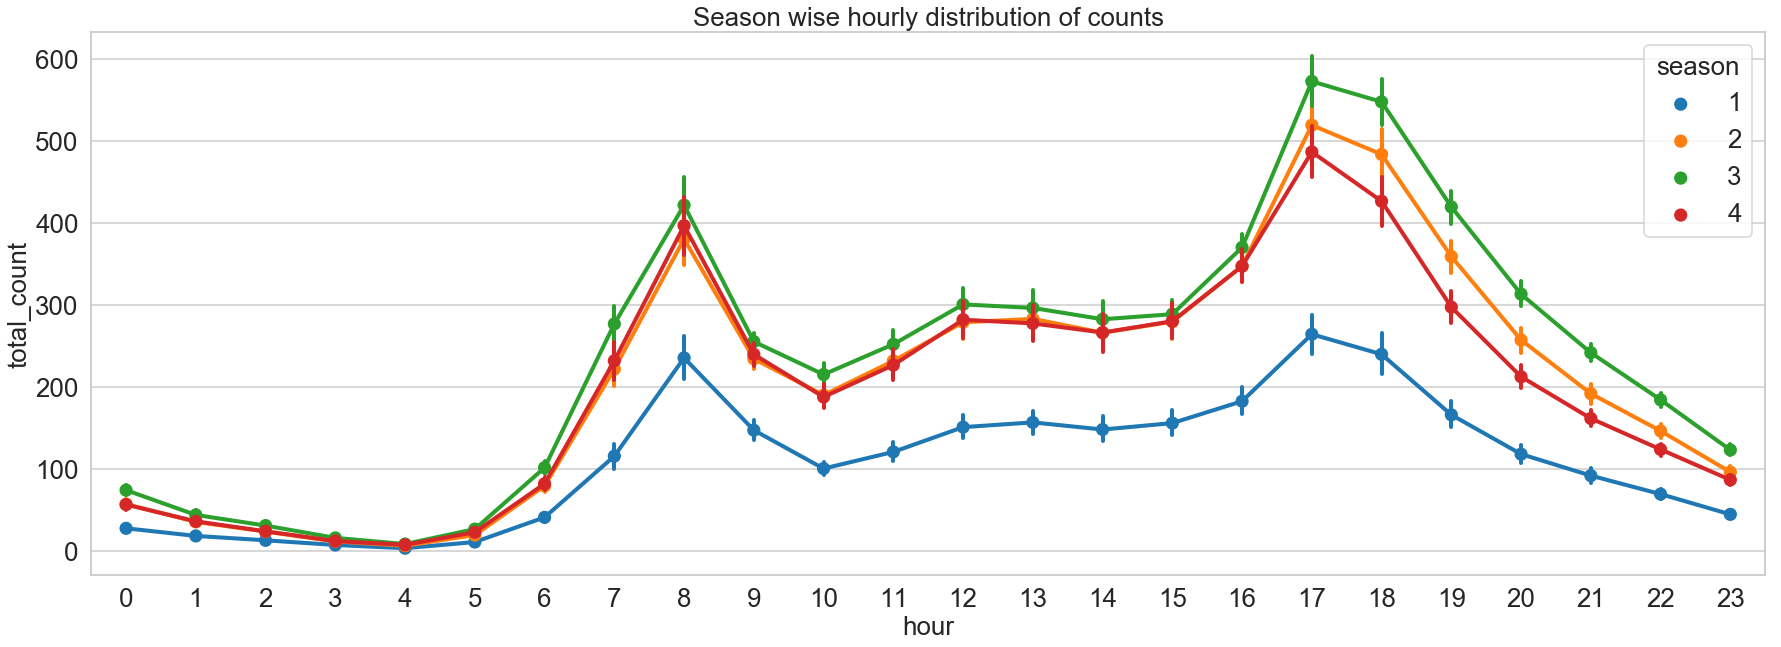

In [14]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
              x='hour',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

In any season, hourly customer count is almost similar

Spring season has low customers compare to other seasons

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,1,'Weekday wise hourly distribution of counts')]

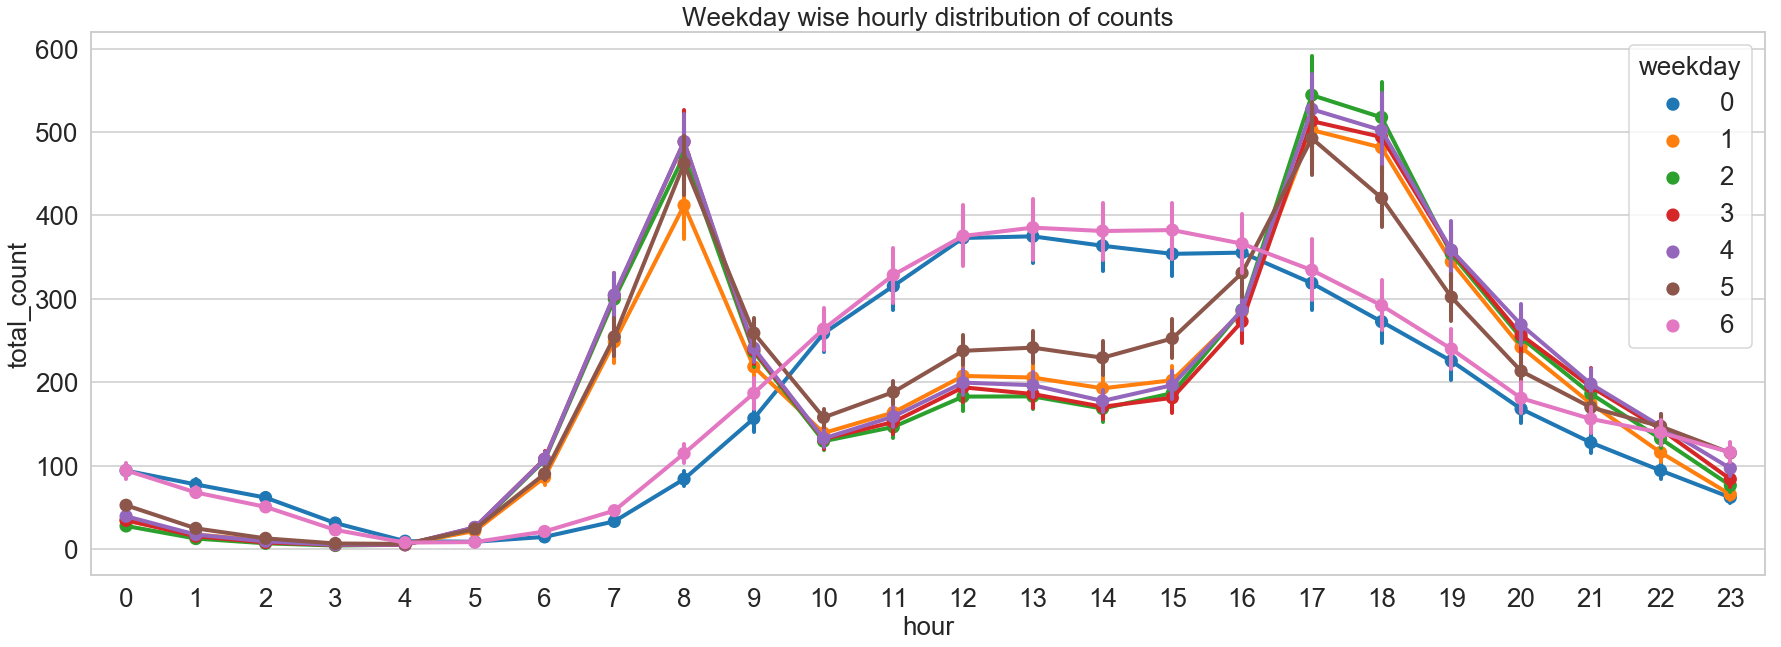

In [15]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

At weekend's there is a hike in customers count at starting and ending working hours i.e 8am and 5pm

In [16]:
#Replacing weekends with 1 and weekdays with 0
#hour_df['weekday']=hour_df.weekday.replace({6:1,0:1,1:0,2:0,3:0,4:0,5:0})

In [17]:
#hour_df['weekday'] = hour_df.weekday.astype('category')

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,1,'Seasonal distribution of counts')]

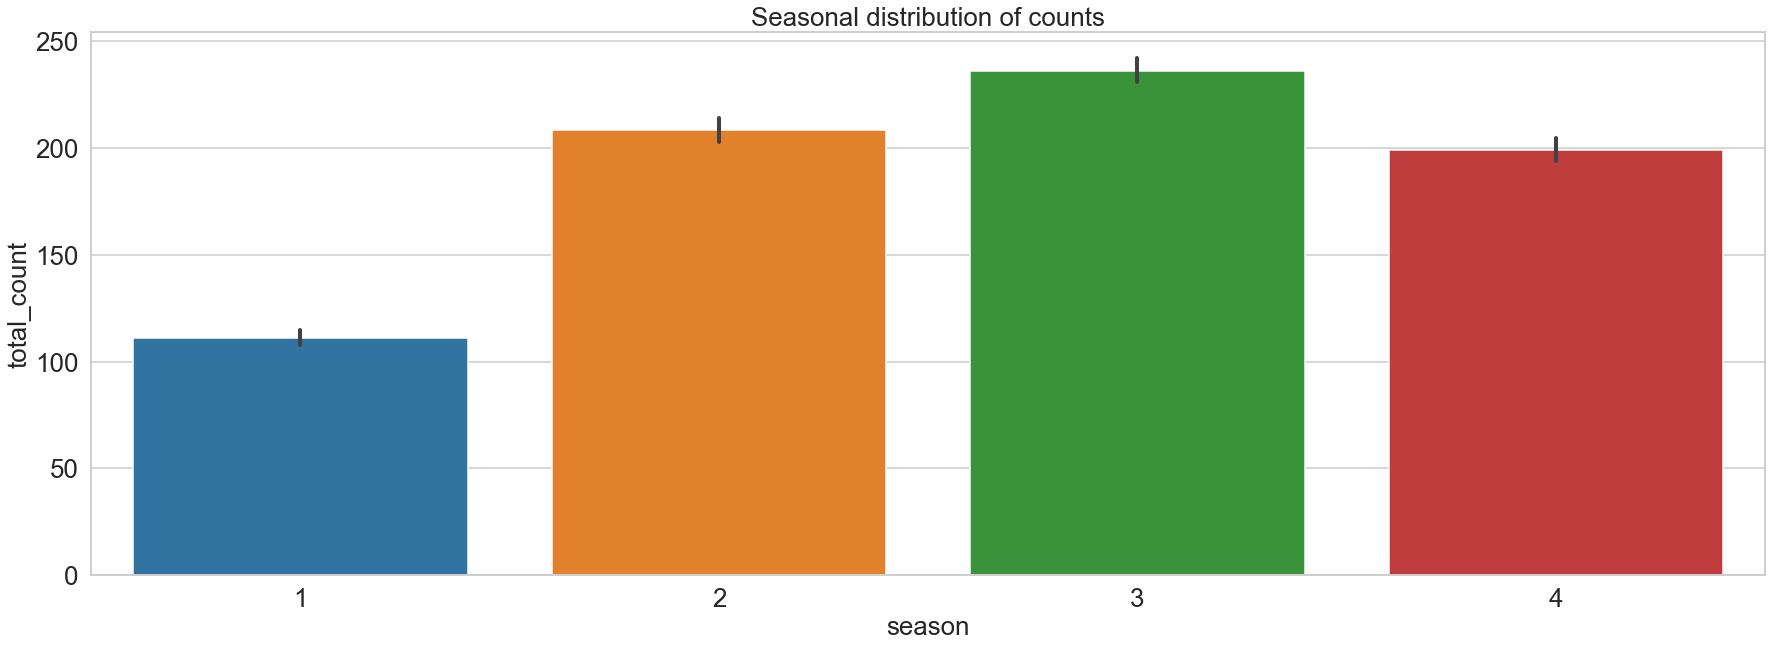

In [18]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

Here also proved low count in spring i.e january, feburary and march

#### here we conclude there are low customers are low cool months

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0.5,1,'Monthly distribution of counts')]

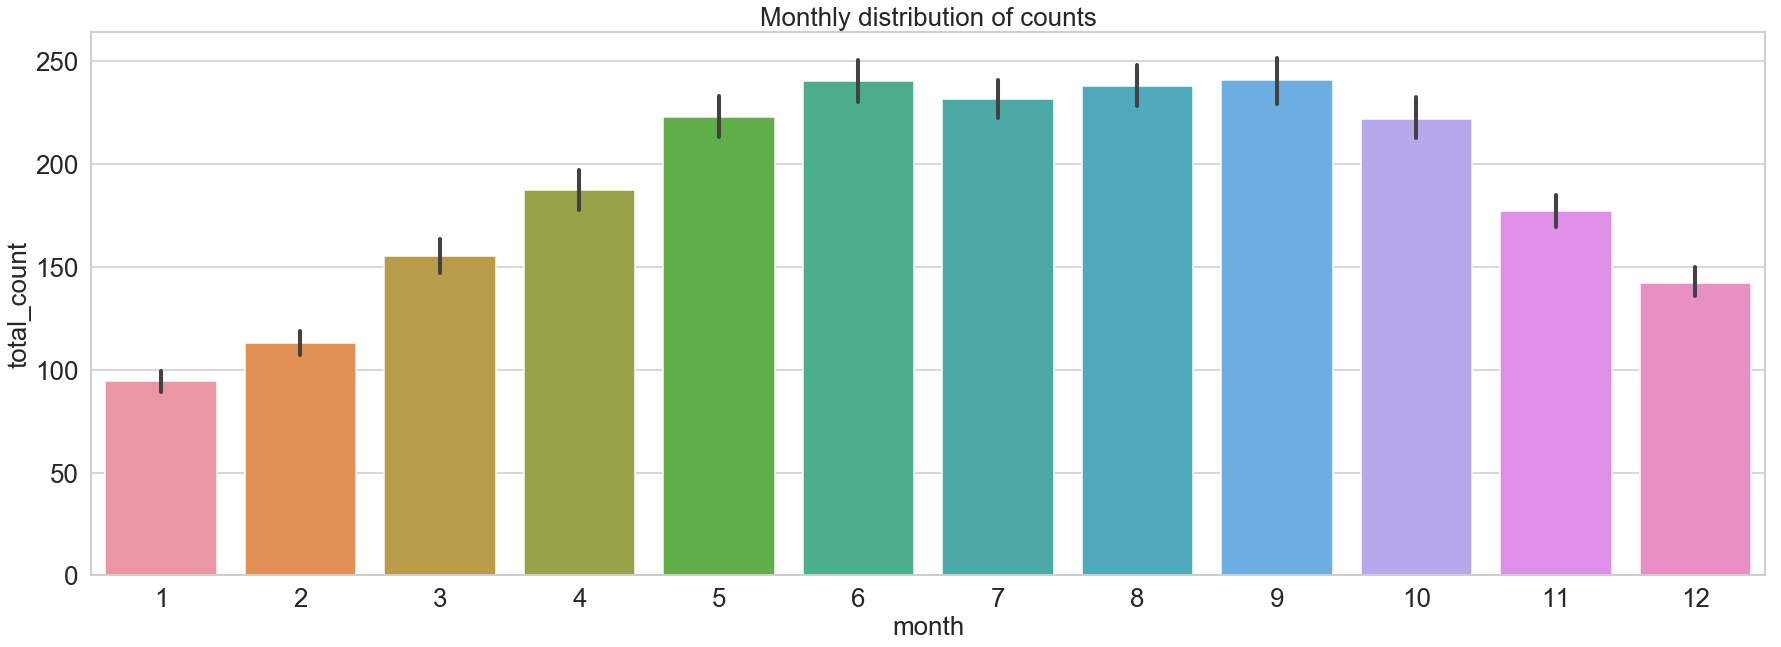

In [19]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

C:\Users\ASHISH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



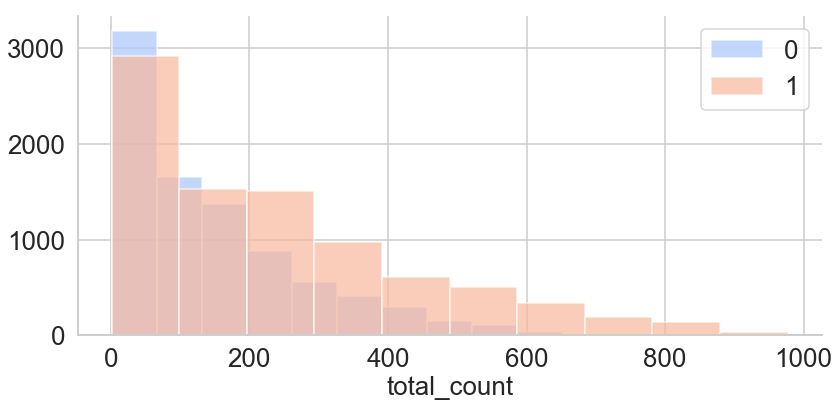

In [20]:
g=sns.FacetGrid(hour_df, hue='year', palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'total_count',alpha=0.7, edgecolor='w')
plt.legend()

The users are increased than previous year

Text(0.5,1,'Number of bikes rented per season')

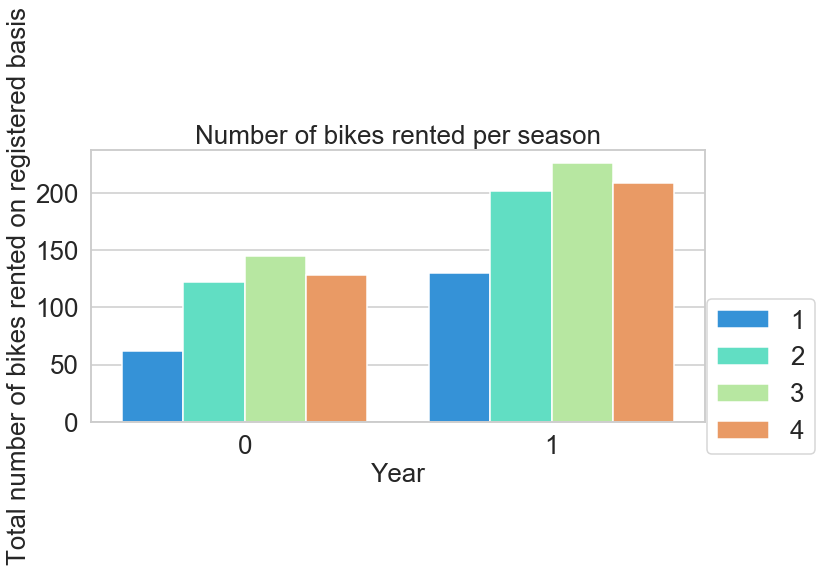

In [21]:
plt.figure(figsize=(11,5))
sns.barplot('year','registered',hue='season', data=hour_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on registered basis')
plt.title('Number of bikes rented per season')

From above we can infer that Registered customers are increasing over year

However, the trend for number of bikes rented based on seasons is the same each year.

C:\Users\ASHISH\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



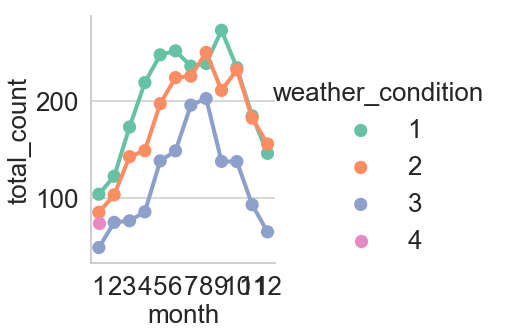

In [22]:
sns.factorplot('month','total_count',hue='weather_condition',data=hour_df, ci=None, palette='Set2')

people enjoy renting and riding bikes on a holiday when the weather is clear.


C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



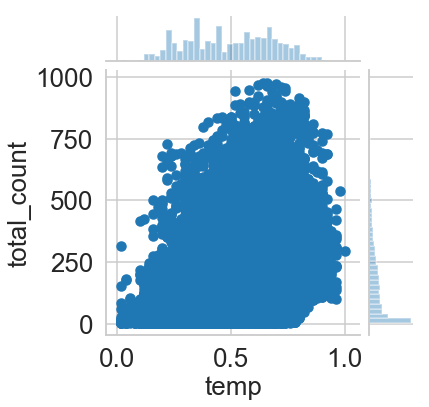

In [23]:
sns.jointplot('temp','total_count',data=hour_df)

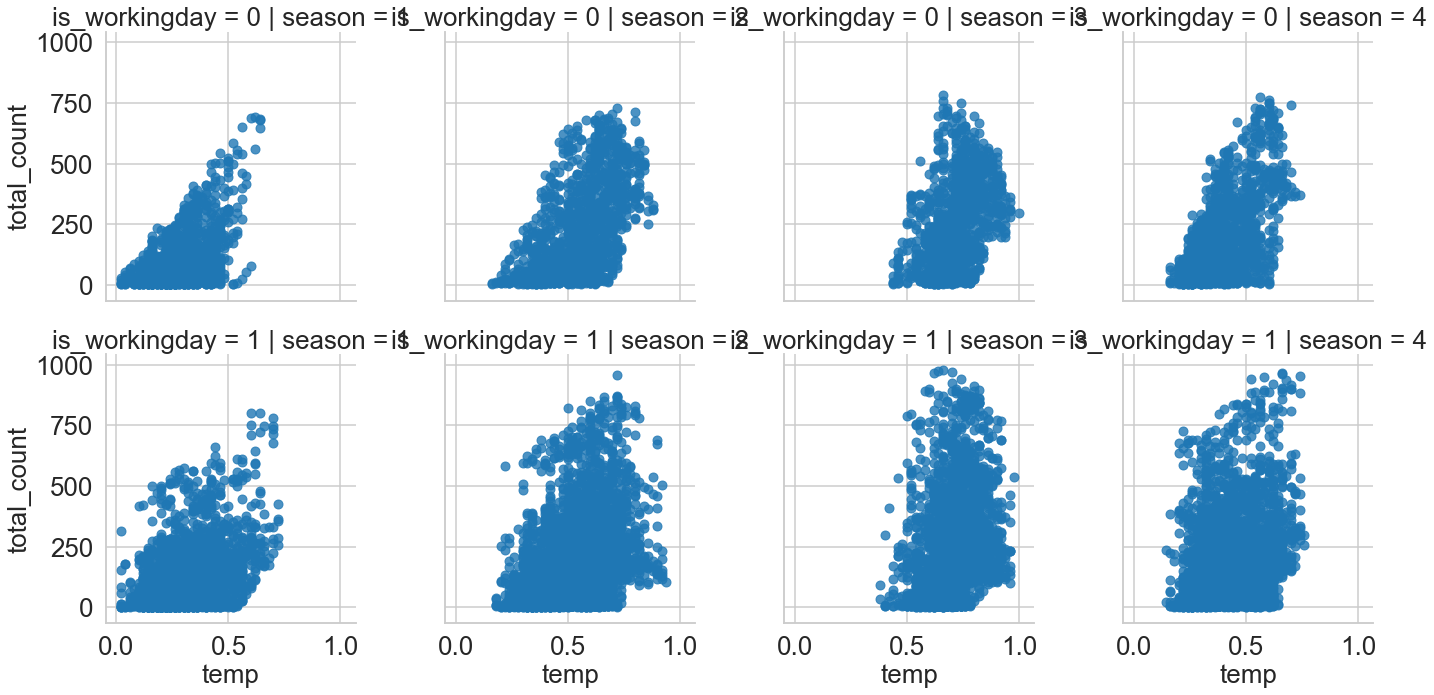

In [24]:
sns.lmplot('temp','total_count',row='is_workingday',col='season',data=hour_df,palette='RdBu_r',fit_reg=False)

#### So, people prefer more and more cycling as the days get hotter.

Text(0,0.5,'Count of all Bikes Rented')

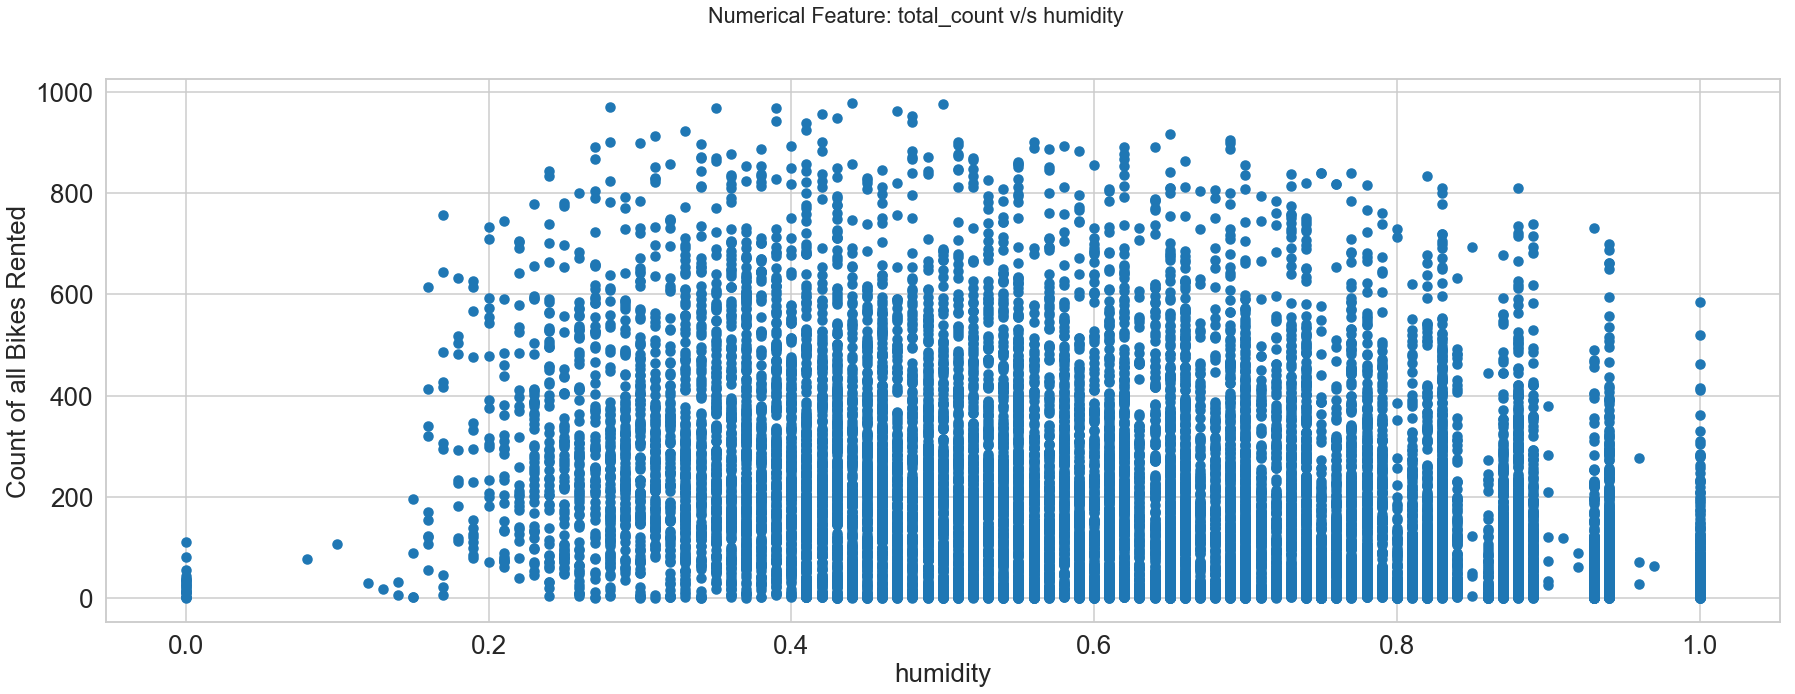

In [25]:
plt.scatter(hour_df['humidity'], hour_df['total_count'])
plt.suptitle('Numerical Feature: total_count v/s humidity')
plt.xlabel('humidity')
plt.ylabel('Count of all Bikes Rented')

Humidity doesn't matter much for people to go out

Text(0,0.5,'Count of all Bikes Rented')

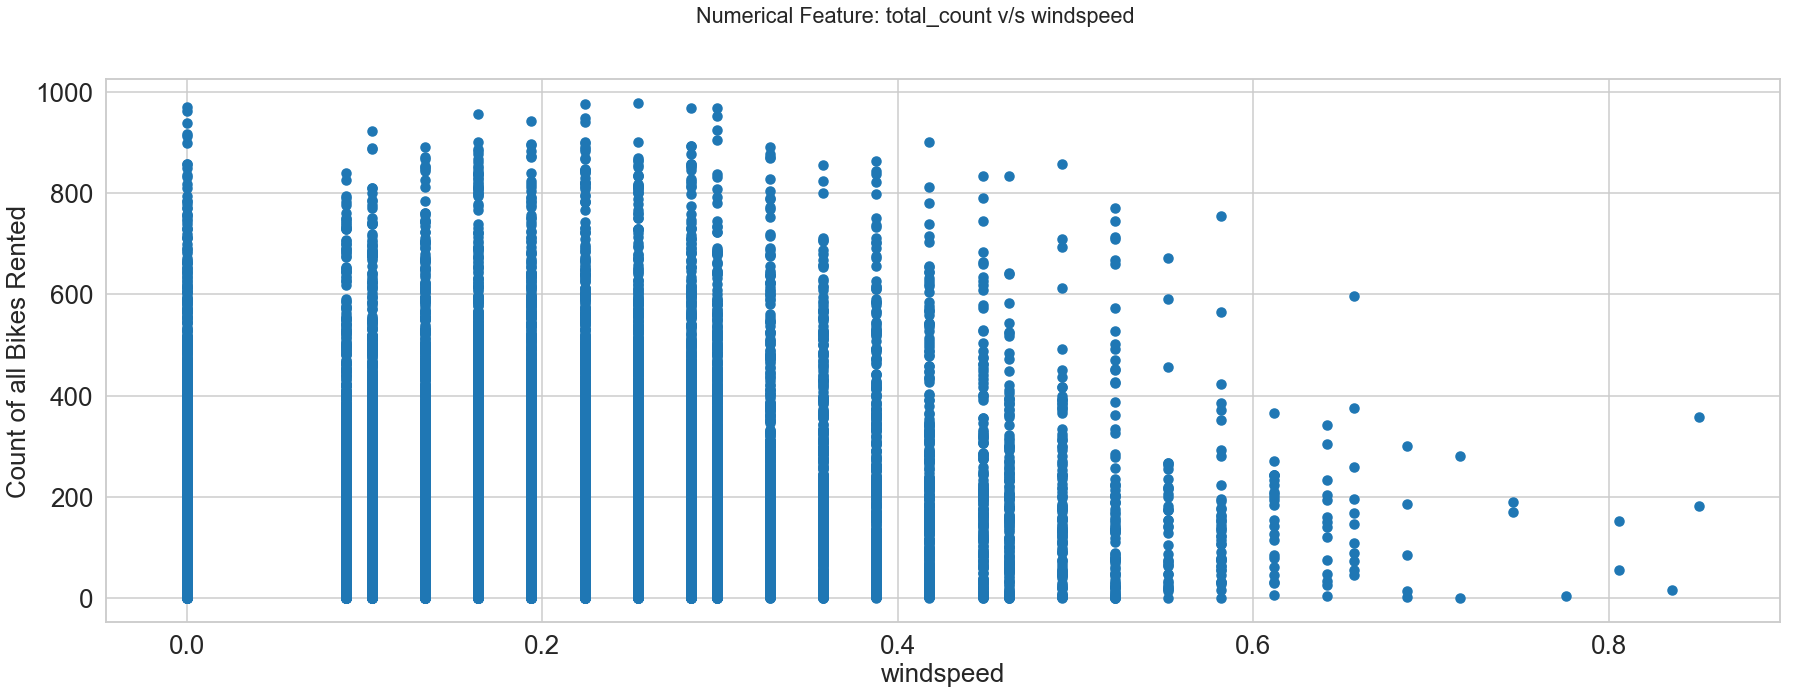

In [26]:
plt.scatter(hour_df['windspeed'], hour_df['total_count'])
plt.suptitle('Numerical Feature: total_count v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Bikes Rented')

we can say too much wind and bike rentals dont seem to mix

## outlier detection

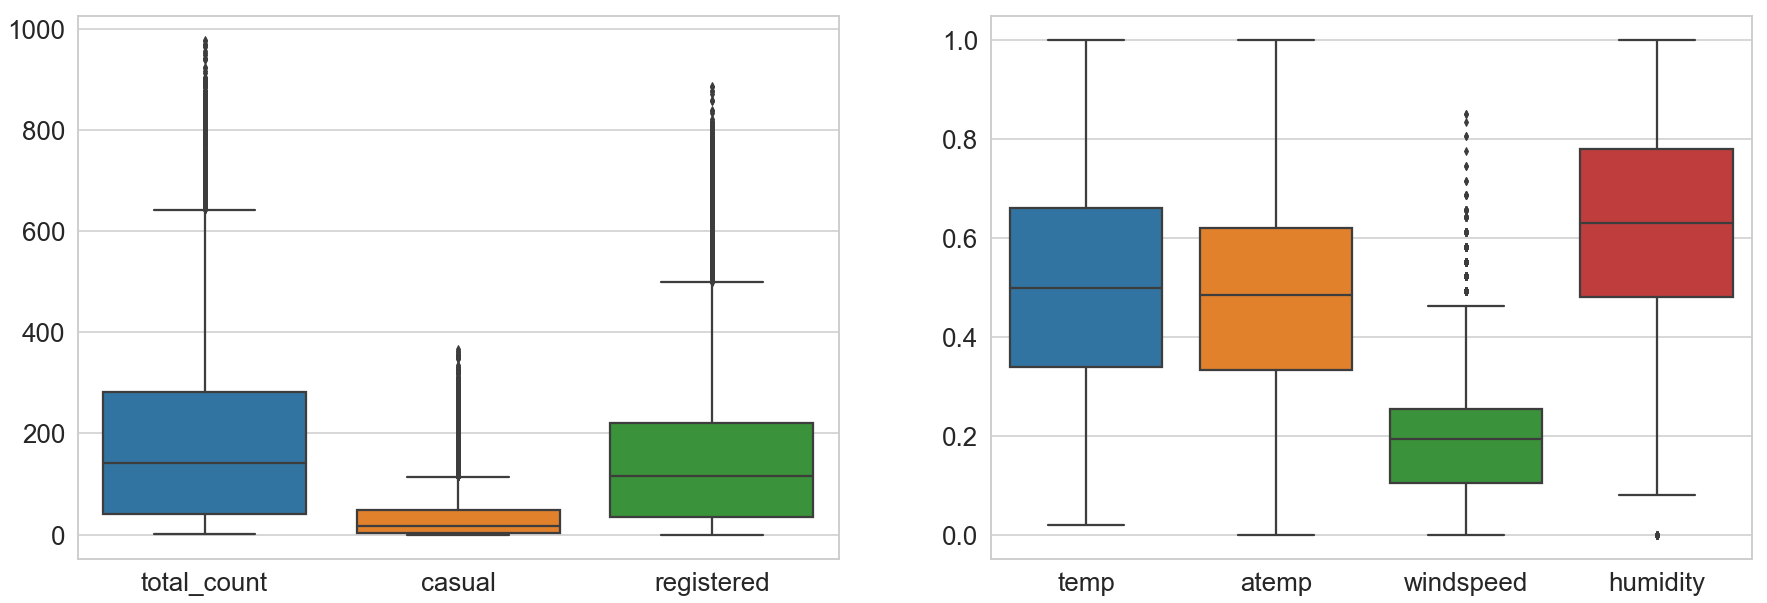

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','atemp',
                          'windspeed','humidity']],ax=ax2)

#### heavy outliers in total, casual & registered counts also in windspeed

In [28]:
hour_df['total_count']=np.log(hour_df['total_count'])

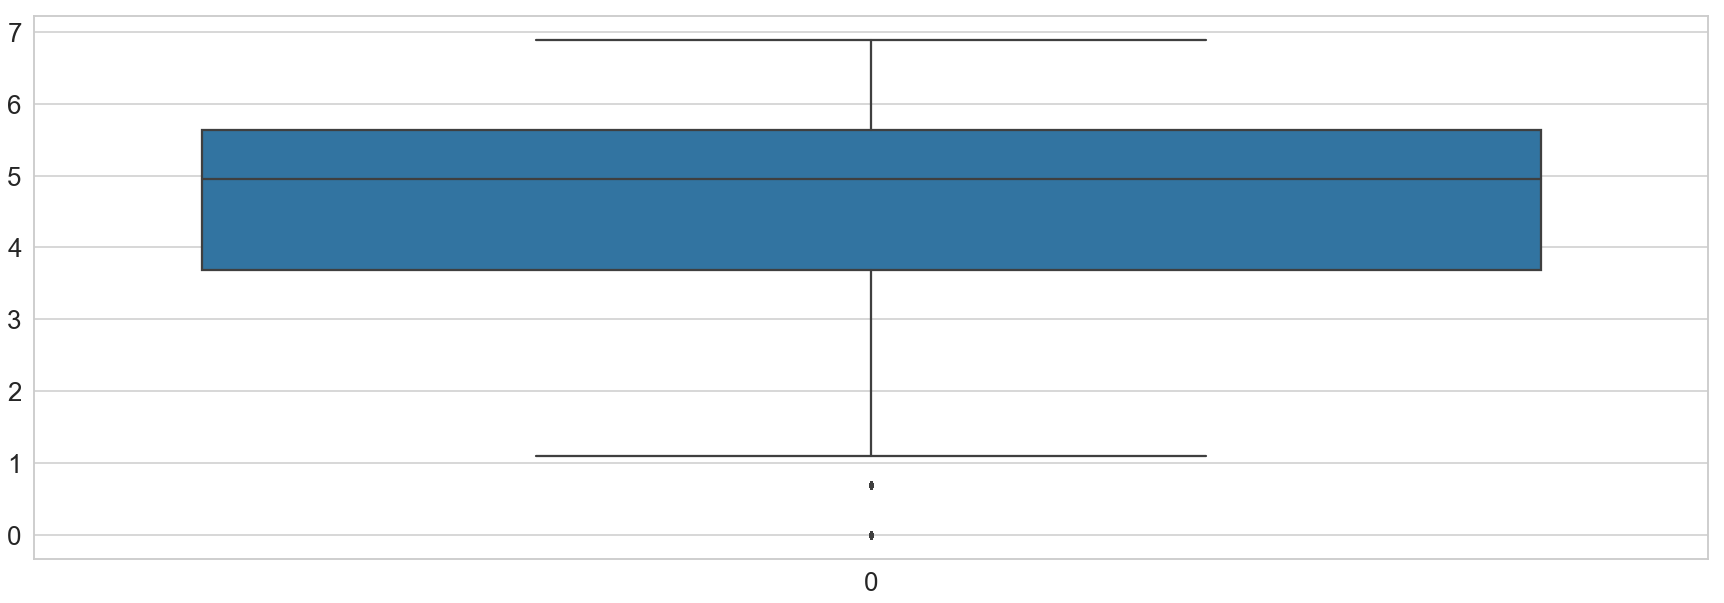

In [29]:
sns.boxplot(data= hour_df['total_count'])

The outliers are reduced drastically

In [30]:
hour_df['windspeed']=hour_df.windspeed.replace({0:0.0001})

In [31]:
hour_df['windspeed']=np.log(hour_df['windspeed'])

[Text(0.5,1,'Checking for outliners in day hours')]

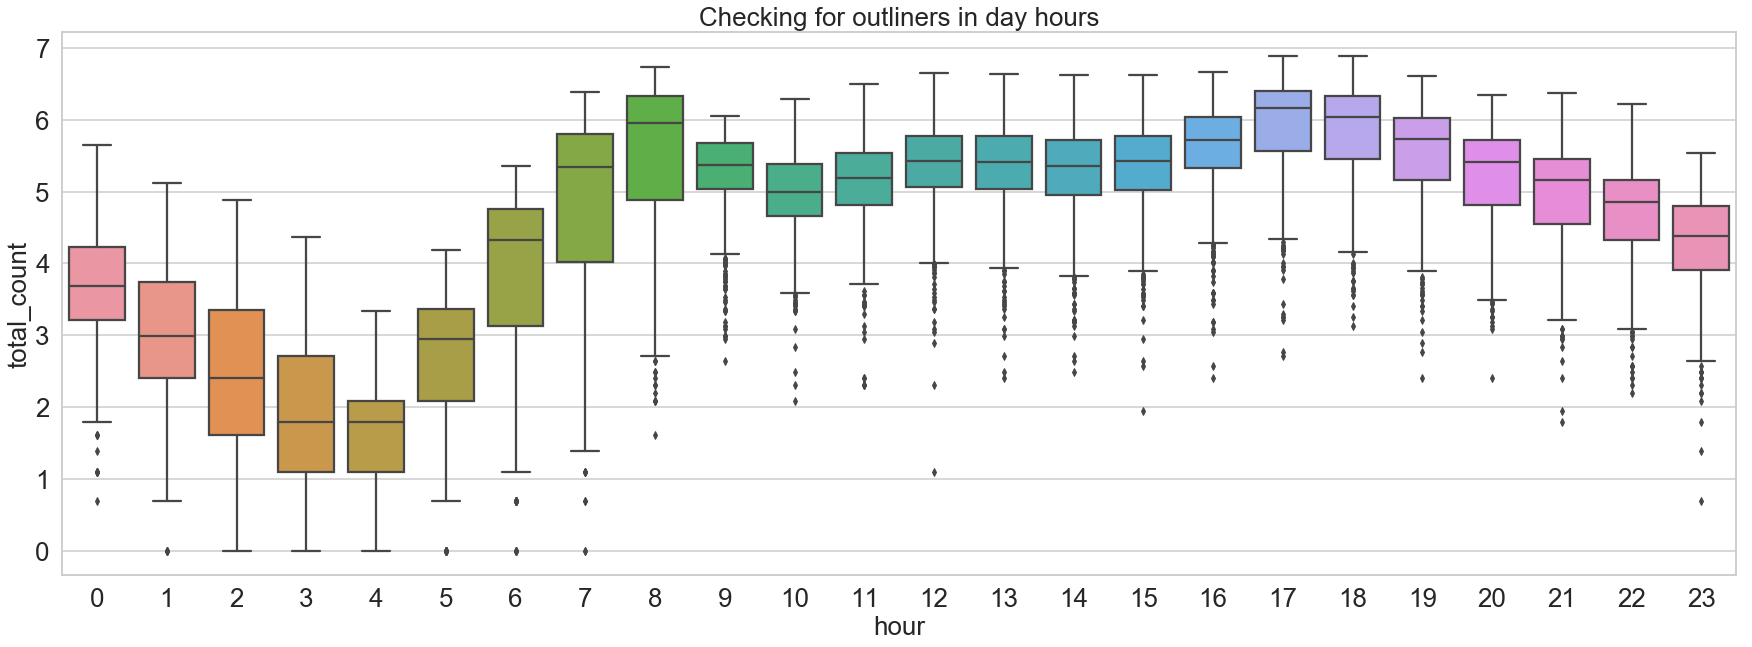

In [32]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['total_count',
                          'hour']],x='hour',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

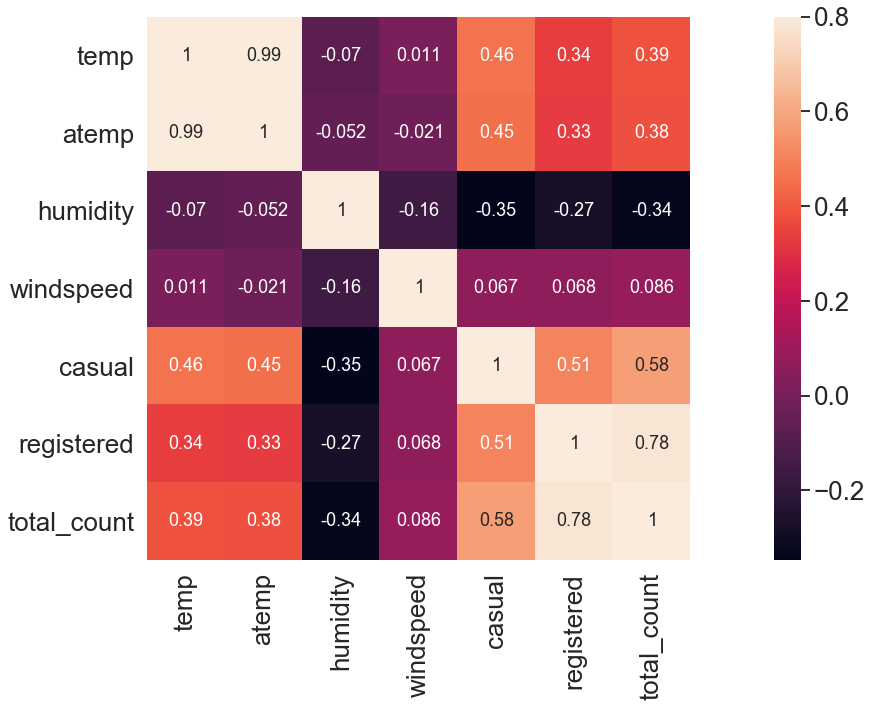

In [33]:
import numpy as np

corrMatt = hour_df[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()

#mask = np.array(corrMatt)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaUAAAElCAYAAABEYv12AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzsnXmYHFXVuN9Zsk72ZCQjm0bkKIuEBBWDbPEzGsQgiwgTFdEgkBAQCIuEgIABDGHfBAIS/RJUUNkCST4Isu8aFsXDLwQiJBlIZpJJZjJZptO/P251p7qnl+qe7umamfM+zzw9VbdO1antnjr3nntPWTQaxTAMwzDCQHmpFTAMwzCMGGaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBQWWoFjNIjIlXAhcAPgF2BOuCvwBWqut7b5l6gn6oeV4Tj/wSYrarDUpR9Bngf2FdV3y7Csb8I/AkQ4FpVvajQx8gVEfkSMFRVn0o+fxH5O/Caqk4rpY5Q+GdCRB4AmlT1J4XYn2+/n6GIz5BRWMwodXNEZADwPNAEnAkosCdwLXCwiByqqi0lVPFDoAZYW6T9nwNsB/YC1hXpGLnyEO76P5Wi7BhgW8eqk5azgLJSK2F0LcwoGVfjmnHH+ozP+yLyb2AZcDJwW6mUU9UIznMrFoOAN1T1vSIeI1fSVvSq2tCRimRCVRtLrYPR9TCj1I0RkV7AROCCZG9IVT8UkcNxnlOMviJyN/B9YAtwh6pe7Nvfj4GLgV2A/wAzVHWBr/x04Gyv/G3gHFV9LoVes4CfAIcCLSQ2X30AXA8cDXwFZzinq+ojnuxg4LfAeKARmAHMAfZQ1Q+SjvN37xgx3T8LrAYuAn6M89BeA85V1Ze97T4A/gycgDMeX1LVdUn7rQFmAd8CegMLgbNUdXWqpiR/86Wn0+7AzSJynHcdknV+TVWnicivgC8By4Gf4u7J/cDZnjHPeE+85rdK4PPe3/HePq4F9sV5jv8L/DK2vyRd7sVrvvPO4Qzv2pwN9PDO+1RVbU6W9eR/BFzqXef5QM+k8rOB04HP4Dz5Bd7yNtx9Ok9V7/ZtvwR4VlUvTXU84Fsi8ifgc8AbwM9896A99yxWPsM795eBCbjn9PvAQOB13PP+ShrdDA8LdOjejAAGAK+mKlTVF1S13rdqPK4yGAn8EpguIt8C8H5vAi7BVWh3AA+IyNe88pNxld3VuIr0KWCBiAz1H1NELgAmAd9U1XfS6H05zvAcAPw/4HciEqvQ7vPO63Dgh8B0oCLNfo4BHsVVpDW4psJbcBX8FGB/4F/A/3mVVoxTgOOAo1MYpB7Ak8BuwBHAWGBn4EERCdLUdQzwEc4wHhNg+yNx3t7XcNd+CvA9T5eM98RjInC7p+eLwIO4a/JFnGE+hSTDmIEvAQcD/+PJHQOclmpD74PnHuA6YBTO6HzXV34i8Ctc8+rnPR2Owhm5LcADwIm+7T+N+8CYn0G/U3FGbTQQBe7yZNt7z2IcibsP5wFTgW9757Q38C7u2ltzZxbMU+reDPZ+gzbDvOXzjJaLyIXAfsAiXCV6jar+0St/T0RGA+fiKvDJOM/qHgBP1q8DIvIzbz//o6pvZNDjvthxROQy3FfvZ0QE3Jfufqr6plc+FXg81U5UtUFEtgAtqlonIoNwzZUnqOpjnvzpwNdxXsB0T/RPGb54vwXs4Z3DKm8fP8B9Sf8PzoimxdMpAmz0/h+QaXucJzlZVbcC6uk7GvgL2e+Jd0i919NzCDAEWO15lR+IyDjgkyw6xOgBnKKqdcC/RGShp0sqTgMeVNXbvGOfg6vEY6wCfqKqj3rLK0TkaVzfHzgPbomI7KSqH+M813+oqt+zT+ZCVX3GO94twJ3e+nbdMx83qOq7nvzPgU3AB6q6xju//XGOQBuv09iBeUrdm1jwwOCMW+0gud9lPdDH+39vYIaINMX+gJNwUW3gKpO4R6aqUVW9QFWXeasG4r7Yt+M8lky86/t/g/fbA/elvgV4y1f+Ytaz2oHgvKq4jKpuB17AnV+MTP1PewMrYpWbt4+PgA+S9lEoVngGKcYG3LWI6ZLpnoDvXLz+qquAO0VkpYjcBfRX1RUBddnoGaRUuiSzD/AP37GjJD4fTwMfisivReQBEXkH+A47vN5ncc/J973lWmBeFv389y352S3EPfPv/xbcM73KM6Y/A95M1QxqJGJGqXuzDKgHvpyqUESuE5HzfKtSvVCx5ohKXJPeSN/f3rgmDYCtuCaTTEwA/gvckGW7rSnWleH6GtrTPJIuyrCMxHclUzRitn2kugbtabFIdy1i+810TyBJXy8kXnD3YA9c02XQMPlMuqQiuSwu7/XZPIvz3B7HeUIP+/SM4prqfiAin8ed2x/JTDqDUKh7Ft+Pqv4/3HX8Pq5f9lzgnyIyPIuO3R4zSt0Yzwv4AzBVRHr7y7zO21NxnkcQ3gF2V9VlsT9cx3ms3f9dXN+B/xj/EpFjvcVGVV2Ia+Y7XkT8TTlB+Reus3xf37qUBjcNy3CGLd7n4vUBHIgLEgjCO8Du/j4or79jd28fsYp3oE9mRNI+CpVPJts9SUBEdhOR23FewzWqejjwG1zfXKF5E/hq0jr/8zEF1/Q42QtmeBPXt+Q3ZH/A3aufAEuSvLRcKMQ9S0BETgG+p6oPqurPccMsdgIOyVPHboP1KRlX4JpFnhKRS3Ht5/vhIpHeZEe7ezZmAfeJyH+A/8N1Fl8G/Mgrvx6YIyJLgZdwwQw7Ac94xwdAVZ8Xkd8Dt4lITs1dqrpMRB4B7hKRKTgDdbNXnLWiV9VNInIzcL2IbMJFtZ2Bq4DuCqjGE7g+rj96/QjgOvPf9cpacc1OF4vIGbgmx5OT9tEEfFFEPhXwmOnIdk+SWYPX1yQi1+KCYL5JmkCYdnIj8Kx3jR7FBVXsh3vmwHnwh4vIXjhDdDauCTjeNKuq//Gep3NIE1ARkELcs2QGAVeISAPunYo1PS5th57dAvOUujleP8LXcaHPdwD/xkXJPQh8W1U3B9zP33ARR+d4+zgP1wH/R6/8j7jQ5Jm4iuUQYLyqrkmxu/Nx/VzpQnsz8VNgJc7Y/RmY661P1bSUil/iZnj4Ha7PY1/gcK85Jites9L3cBX833FRXauAb6jqVs87PRkX6fVvXGWb3Dx2I85wLAqoczpdMt6TFNu34Jr29sVVnk/gQvfPbI8eaY71Eq5p6xScQdgLFzkZ4yzch8Rrnh69cP1doxL3FI+2+2s7dCnEPUvmOuD3uOdIca0Ox8YCIYz0lFnmWaOrICJ9gXHA417YMCLyZeA5oEpVW0upn1F4ROQaYBdVTdkkaXQ+rPnO6EpsxjWz/V5EbsU1oVwL/MUMUtdCRL6C8+hOxdf8a3R+rPnO6DJ4zSwTcIEJb+Gav97BVVxG12IsbmDwbar6bKmVMQqHNd8ZhmEYocE8JcMwDCM0WJ9SCl5//fVWnMHekG1bwzAMI84AYPvo0aPzti0lMUregMTHgAWqeotv/XTcoLn+uJwyZ6iXZM4rn4Sbf2wnYAlwmjcdSKx8Am7Cz8/iQklPU9V/5aFiOVBWUVExMOuWhmEYBgCRSATa2QLX4UZJRMpxHZTfxk1FH1s/GTce4se4gXN34lIOxAbzHYGb+uRnuM7ra4C/ichXVDUqIvvhxpecixtrcCGwUET2TE7LEIANFRUVA0eOHJn3eRqGYXQ3li5dSiQSaVcLU4f2KYnICOBp3AC99UnF5wK/VtVFqvoabuLIY0VkN1/5Har6J28G6FrcCPCve+VnAo+p6m2q+m+c8erBjtmQDcMwjJDT0YEOsVDdUfjSJXiTFI7AjcIHQFXfwiUZO8jzrg5MKq/HjTaPGaWDksq34WZ3jpUbhmEYIadDm+9UdT7etCBe7psYO3u/K5NEVuMyZg4G+mYoj+0jVfln8tE1EomQOTWLYRiG4cfrU2oXYQkJ7+v9Js9IvQU351W28tg+MpUbhmEYIScsIeGxQIRewEbf+l647I3+clKUx/aRqTwnKioqkr05wzAMIwNeoEO79hEWTykW1l2TtL4G1yRXjzMu6cpj+8hUbhiGYYScUBglLznXcuDg2DoR2Rc3oeaL3tTyLyeVD8WlVH7BW/VCUnkPYIyv3DCMbkRrayt1dXWsXLmSlStXUldXR11dHa2tmefmzVfOKAxhab4DN3bpchFZAdThZnu+X1X/65XfiEvC9RYu18ts4J++yRhvAV4SkV8Ai3HjlLYA93fgORiGEQJaW1uZNGkSq1evblNWU1PDnDlzqKxsW/3lK2cUjlB4Sh43AbcD9+KSbP0blwAMAFV9CJek7CrgRVzStqN95f8AJuIyhb6GS2UcOEmdYRiGUXpslvAUvP766+ttRgfD6Ny0trbyzjvvMG3aNABmz55NdXU1w4YNy+jt5CtnxAMdGkePHj0o333YFTYMo0tSWVlJdXV1fLm6uprhw4cXTc4oDGFqvjMMwzC6OWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDZWlVsAwik1raytr164FIBKJAFBRUQHAsGHDqKy018AwwoK9jUaXprW1lUmTJrF69eqU5TU1NcyZM8cMk2GEBGu+MwzDMEKDfR4aXZrKykrmzJnD2rVrWbNmDdOmTQNg9uzZVFdXW/OdYYSMUL2NIjIAuB6Y4K1aAJytqutEpBK4FqjF6f0HYJqqbvXJTwemAP2Bh4AzVHV9B56CEUIqKysZPnx4wrrq6uo26wzDKD1ha767BfgS8G3v70vAHK/sSmA8zmB9z/u9MiYoIpOBM4GTgcOBvXyyhmEYRicgbEZpAnCdqr6uqq8Ds4FxItIbmAycq6ovqurTwFTgNBHp48meC/xaVRep6mvAScCxIrJbCc7DMAzDyIOwGaUGoFZEBnpNeScArwIjgSrgGd+2T3vrRorIcGCEv1xV3wLWAQd1kO6GYRhGOwmbUToN+ArOmKwD9sb1Ie0MNKtqY2xDVd0AbAJ28coBVibtb7VXbhiGYXQCQhXoAHweeAfnIUVxgQ3/C8wFtqTYfgvQC+jrW05VnjORSARVzUfUCCn19fXx/5cvX05jY2OGrY0w0tjYyL333svJJ5/MgAEDsm6f7z23ZyU/YoPT20NoPCUR2QO4Gfi5qj6lqn8HjgHGAi2kNi69cN5Si285VblhdAsaGxu58cYb2bBhQ6lVKQoLFy5k+fLlLFy4sNSqGEUiTJ7SKGCLqr4bW6GqK0RkLbAnUCUi/VV1I8TDx/vimuw+8kRqgLW+fdbQtkkvEBUVFYhIPqJGSKmrq4v/P2LEiC4ZEn7zzTezfPlyXnrpJaZOnVpqdQpKfX09r776KtFolFdeeYUpU6YwZMiQjDL53vPu8KwUg6VLl7bbWwqNpwSsAnqLyJ6xFSKyEzAUeB5oBg72bX+ot+4NVa0DlvvLRWRfYBDwYvFVN4zSU19fz+LFi4lGoyxevJiGhoZSq1RQ5s+fz/bt2wHYvn078+bNK7FGRjEIk1F6CXgduEdERovI/sB9wGvAs8BdwC0icrCIHIJr6rtVVTd78jcBl4vId0RkNK4f6n5V/W+Hn4lhlICuXmkvWbKE1tZWwM1puGTJkhJrZBSD0BglVW0FvgN8ADwGLMJ5T99R1e3AhcBi4BHgr7gZG6b7dnETcDtwL/Ak8G/glI7R3jBKT3sq7fr6eqZNmxZq72rs2LHxKaEqKysZO3ZsiTUyikGY+pRQ1Y+BH6Yp24ILGT8tTXkUmOH9GUa3Y+zYsSxYsIBoNEpZWVlOlfb8+fN5++23mTdvXmj7ompra1m8eDEA5eXlTJw4scQaGcUgNJ6SYRjtY/z48USjUQCi0Sjf+c53Asm1py9q2bJlHH300SxfvjwnXfPxzIYOHcq4ceMoKytj3LhxWYMcjM6JGSXD6CI8/vjjCcsLFiwIJNeevqhZs2axadMmrr766uCKkuiZ5UJtbS377LOPeUldGDNKhtFFSO5DCtqnlG9f1LJly1ixYgUAK1asCOwttcczGzp0KLNnzzYvqQtjRskwughjxozJuJyOfAMIZs2albAc1FvqqlGCra2t1NXVsXLlSlauXEldXR11dXVxg28EI1SBDoZhFI6ysrJA29XW1rJo0SIgtwCCmJeUbjkdqTyzsAZXBKW1tZVJkyaxevXqNmU1NTXMmTPHkkkGxDwlw+givPDCCwnLzz//fCC5oUOH8ulPfxpwFWjQprHdd98943I6kj0xC+02/JhRMowuQr7NcPX19axatQqAVatWBe7jOfXUUxOWTz/99EBy48ePT1gOGiUYZiorK5kzZw6zZ8+Or5s9ezZz5841LylHzCgZRhehtraW8nL3SufSDJdvH0+yZ/bcc88Fkvvb3/6WsPyXv/wl4/axvprk/pqw9dVUVlZSXV0dX66urmb48OFmkHLErpZhdBFi43gWLFiQ0zieJUuWxCfRjEQigft4UkX7BZF76qmn2iyfd955Kbe1vpruh3lKhtGFGDNmDGVlZXz961/PSSbTcqHlkgMwggZkGN0DM0qG0YW444472L59O7fffntgmY0bNyYsNzU1BZLbsiUxp+bWrVsDyY0ePTph+YADDki7bayvZu7cuW36a8xL6pqYUTKMLkK+g1lfeeWVhOWXX345kFy+0X65hpJXVlYyfPjwNv01ZpC6JmaUDKOLkO9g1th8eemW05FvM5w/gR6Qsr/I6L6YUTKMLkK+g1nz5bDDDktYPvzww4t6PKN7YEbJMLoIVVVVGZfTEQsjT7ecjqOPPjph+Zhjjgkkl5xavKamJpCc0T0wo2QYXYRNmzZlXE5Hvs1w+c5K3tjYmLC8fv36QHJG98CMkmF0EfLtG4qNUUq3nI4nn3wy43I6DjrooITlXMLXja6PGSXDCCGdIT35pz71qYzLQQlqPI3ugRklwwgh+SbB60g++eSTjMvpSA4dDxpKbnQPzCgZRshoTxK8jiS5GS55OR2F8rCMrokZJcMIGZ0lCV6+Mzp8/PHHGZeN7o0ZJcMIGfmmJ8/XA+nXr1/G5XQkN7sFnSV86NChCcvDhg0LJGd0D8woGUbIGDt2bDwsu6ysrOhJ8JI9nKAeT8ybS7ecjuQZHGK5nAwDcjBKIrKbiLQZwCAiFSIyOpWMYRi5M378+HhEWjQaDZwEL9/Ag4qKioTlYs8pl68xM7oHuXhK7wOp/OzdgGcLo45hGI8//niCpxR0UGq+tLS0JCwHHXSbL5a6wshExk8iEfkpcJq3WAYsEpHkdI/DgQ8Kr5phdE+WLFmS4CkFTZ7Xq1evhOCDXr16FU3H9pDvIF+je5DNT/8TsAvOIB0APAn4k61EveUHiqKdYXRDxo4dy6OPPpqwHITkaLjk5bBQXl6e0GQXdK49o3uQ0SipajNwOYCIfAD8UVXD+aQbRhdhzJgxCUap2NPw7L///vzzn/9MWC4mgwcPpr6+Pr4cNG270T0I3KOpqnNFZH8vqKEHznvyl99WaOUMoztyxx13JCzffvvt3HnnnVnlevfuzebNm+PLffr0CXS85PxGycuFxm+QANauXVvU4xmdi8BGSUSmA1cADcDGpOIo0G6jJCIV3jF+CvQGFgKTVbVBRCqBa4FaT+8/ANNUdatPfjowBegPPAScoao2BbHRqcg3L9K2bdsSloOGdieHaFvSPaOU5BL7OQmYoaozi6UMMBM4CfghUA/8DvgtcDxwJTAemAD0BOYCW4FpACIyGTgT+LEneycwBziuiPoaRsEZPnx4grcSNN9QvrN9G0aYyMUoDQX+XCxFRGQA8AvgBFV9wlt3NnCHiPQHJgMnquqLXtlU4D4RmaGqLcC5wK9VdZFXfhLwpojspqr/LZbehlFo8g2RLisrS4hk626h1pFIhDVr1iSs8y8nl8Worq5uM1bLKB25GKUHgInAr4qjCgcD24H4oAxVfQrYU0QOBKqAZ3zbP+2tGyki7wMj/OWq+paIrAMOAswoGZ2GfJvTevfunTDmKGifUp8+ffKSy5eKiooEL65QBmHNmjWcdNJJacunTZuWcv3cuXPbZMM1SkcuRqkF+KWIfB/4f7imsziqenw7ddkDZzyOFJFLgWpcn9I5wM5As6rGU1aq6gYR2YQLWY/psjJpn6u98pyJRCKoaj6iRpGIRCLxLKWxkOJYOPGgQYOyVm7+Dvbly5e3yYAaFpKb74YPHx7oWUw1CDYfuZaWlkBylZWV8Tn6YstB5FI1MwaRy3b/kgMogpJtX7k8K6V4xhobG7n33ns5+eSTGTBgQNGPl4lCNBnnYpT6AvPbfcT09Ac+DVyCM0QR4AbgPu8vVSj6FqCXpxsptomVG52cSCTCzJkz00ZqDRs2jOnTp3eJZphjjjmG227bETd07LHHllCb9FRVVSVUulVVVSXUJpHDJ1xMn34u1Hz7dldRlpfveDZamhp46uFfl0S3QrNw4UKWL1/OwoULOf749voGpSeXkPCTi6kIsA1nmH6iqm8AiMjPgNeBJaQ2Lr2ATTgvLra8MUV5zlRUVCAi+YgaRaC1tZUePXqkLe/Rowd77rlnxnnb/N7HiBEjQttk87vf/S5h+cUXX2TChAlZ5QYPHsy6desSlvN9hoPIJXsBjY2NgeRS9X0Fkct2//zlffoNoap/ddZ9BtlXLs9KRz9j9fX1vPrqq0SjUV555RWmTJlS0nFfS5cubbe3lEtI+BGZylX1sXZpArGpgv/lW/eO99sLqBKR/qq60dNnAM5DWgl85G1XA/g/pWto26RndEIqKyuZM2cOa9euZc2aNfH+gdmzZ1NdXc2wYcOKPpFoR+EfyArwj3/8I5Cc3yClWi41ra2trF27lvLy8oSKy2Z0yJ9UubeCTEkVZnJ5ix9Ns34zzii01yi94P2OAl7x/t/b+/0r8EtcMETsOIcCzcAbqrpZRJZ75W8BiMi+wCDgxXbqZYSEysrKNl+e1dXVofV4ujq5zLXX2trKpEmTUgZt9OzZk9bW1i7zUdGRpMq91W2MkqomfM54A10/B9yKG8jaLlT1PRH5C3CPiJyCC164E3hMVd8RkbuAW7xQ7zLgZuBWVY0NYb8JuFxEVgB1wF3A/RYObnQXkmd06N27d8btY57LTjvtlJD9dZddgsUGFWquvf79++clZ7h5ERcuXBg36sXOvdUR5P1poqoR4F0RORd4GPh9AfQ5CZiNCwuvwM3KEDP7FwJ9gEeAVmAeMN0nexMutca9uGmQHsWNbTKMbsGAAQMSjFKmSKxMnktLS0vBPZd0za8HHHAAl112Wbf2kmIfB7EmzViwTpAm6draWhYvXgy4ZtCJEycWV9kOoBBPwgBS51nKGW8C2NO9v+SyLbg0Gqcll3nlUWCG92d0Y1INooTsAyk76yDKWKWWKslfPsalZ8+ehVQvTqrm1x/96EclN0iRSKTNfH8dNeg208dBTU0Nc+bMyXh9hg4dyrhx41iwYAHjxo3rEpPb5hLoMCvF6oHACcDjBdPIMNpJtkGUkHogZWccRJmpUgOYNGlSyootnedyzjnn8I1vfKPDDMWgQYM65DiZaGhoSDuwFsI/6La2tpYVK1Z0CS8JcvOUvpy0HMX1+9yEmyjVMIwk6uvrueqqq7joootC9xWbynPZb7/9Su65dCdiHwfvvPNO3hGlQ4cOZfbs2cVWtcPIJdDh8GIqYhjFYOhRUOEb0xn1csuVeWE7kWaof6h4x58/fz5vv/12TqG6yfmNRo0alXbbdB7PTjvtxKxZs7pUqHxH8P0jLqFfVfpBt03NDdz/2OUFPWZlZSXV1TvGVHX3iNKcnlYvzPp8XKh2OfAf4CZVfSGjoGGUiIoqqByQaWLS4qXirq+vZ/HixUSjURYvXszEiRMDeUvJfUP+yLhUpPJ4zjjjjKJVbLE+rK5Iv6ohDAw46NYoDoFHrYnIeOAfuNnCHwDux83A8LSIjCuOeobReUk1sDEIK1euzLgchN122y1nmSDE+rDS9dn558IzjHzIxVOaiUsNcZl/pYhcjEvMt7iQihlGZyffgY2pJjrtDNjMDEYhyOUp+iJubFAyfwT2LYw6htF1GDt2bNyg5DKwMdnbCJP3EevDmjt3LmeffXZC2Y033thpDKgRXnIxSv8F9k+xfjTwSYr1htGtqa2tjXsPuQxsTB77EraxU7E+rJEjR8bXDR06lD333LOEWhldhVw+a24FfisiuwAveeu+hptVIdUYJsPo1uQ7sLEzpjX/xS9+UWoVjC5CYE9JVW8CrsNNjPq893cOcKmq/qY46hlG56a2tpZ99tmnywxsTEexAiuM4lFfX8+0adNoaGgotSoJ5NQzqaozcZlch+Nmc/iyqt5SDMUMwzCM4uEfQxcmcgkJ/7SIPAP8SlU/8fIavS0iT4qIBfYbRgpuvPFG3nrrLW688cZSq2IYcZLH0IXJW8rFU7oNl8X1Tt+6UbiU4zcVUinD6ArU19fz8ssvA/DSSy+F6sU3ujf5jqHrCHIxSocBZ6nqB7EVqroCmAZ8q7BqGUbnJ9k7Mm/JCAupxtCFhVyMUgvw6RTrhwLhDw8yjA4m5iXFeOmll9JsaRgdS75j6DqCXELC/wjcJSK/AF7DTRo2CheRd38RdDMMwzCKQJiTA+ZilH4JDAH+issKC7AdmINrwjMMwwgFm5oy999lK+/qhDk5YC6pKzYDJ4nIVGBPXC6l5ara5N9ORCYBf/Ki8wzDMDoE/3RMf3/414HlOsPg5GIQ1uSAOU9UpaobcM136bgOWAKYUTIMwygy+SaSDGtywGLMnpgpeY1hGEZR8E8Ge9iEi+nbL30FvampIe5NhW1uwVzJJ5FkmLEpfQ3D6HL07TeEqm6QrC/fRJJhxhKgGEaR2H//xEn1M6U1B9cnUldXl7bMMJIJ8yDYfDGjZBhFYvXq1QnLq1atSrtttoyukyZNMsNktCHOPRgrAAAgAElEQVTMg2DzxYySYRSJZK8nnRdkGPkS5kGw+VIMoxQtwj4No0vjz+h6yimnJJSdf/75zJkzx7K6Gm3IN5FkmCmGUdqCG1RrGEYOxDK6fv3rX4+v6927N9/4xjfMIBkpiQ2CLSsrC90g2HzJ+KSLyF5Bd6Sq//Z+u37Ii9EtaG1tZe3atcCOAZax8OFhw4Z1iKE488wzi34Mo3MT1kGw+ZLtrXob1xyXbuxRrCzKjqmHDKPTEws8SA5WiFFTU9MhTWp77713UfdvdH7COgg2X7K9UZ/tEC1SICJXArWq+hlvuRK4FqjF6f0HYJqqbvXJTAemAP2Bh4AzVHV9B6tuGEY7iEQirFmzps16/7pU5bHQ6Pawsbm+XeVG+8lolLx8SRkRkZ7AaCDrtkERkdHAecBK3+orgfHABKAnMBc3/940T2YycCbwY6Ael4xwDnBcofQyug+xwIO1a9eyZs0apk1zcw7Pnj2b6urqDmu+646sWbMmbWh8jNj98JOvt+Cf++6Bx64ILLdly5Y2EZXZDCdAdXV1p59FopgEfqtE5GvAb4G9aBsgEc1lX1mO0xO4F3gB2N1b1xuYDJyoqi9666YC94nIDFVtAc4Ffq2qi7zyk4A3RWQ3Vf1vIXQzuhexwAM/1dXVbdYZ3ZN169ZxwQUXpC1PZTgB5s6da89QBnIxJDcAa4ATcF7KKcCuwHRgUgF1ugRYBjzJjpQYI4Eq4Bnfdk9760aKyPvACH+5qr4lIuuAgwAzSobRCdn1qAvoUTU4vhzd7ryasnLnaWxrXseHD/2mXcfwey3HHTGD/lVD0267sbk+7k2Zt1MccjFKXwK+qqpveon+PlbV+0TkE+AXFCDRn4iMAn7uHcvf7LYz0KyqjbEVqrpBRDYBu+Ca8SCxuQ9gtVduGEYnpEfVYHoMGNZhx+tfNZSBecyZN+kbFzOwjwvHjniGs6J8h9FqbGlgzpPB02lkIwyRocUiF81bgQ3e/+/ivJclwFM4L6pd+JrtzlPVOhHxF/fFjX9KZgvQyysnxTax8pyJRCKoaj6iRpGpr9/R2bx8+XIaGxvTludCqn0FOV4uBHmm8j1eV5HL9/59+OGHJZMb2GcIg/sFM2bZzjnbtYxEIsycOTNulJIZNmwY06dPL4knV4jcVLkMnn0ZmCwi5cAbuKADgH3Y4am0hxnASlWdm6KshdTGpRewySsnxTaxcsMwDKMTkGs69MeAT4C7gQtEZDmwEy7Krb38EKgRkVgm2x5AD295PFAlIv1jGW1FZADOQ1oJfOTJ1AD+z4ca2jbpBaKiooIkb80ICf6IpxEjRrTpNPaXR5og08xXEV/e5FT7CnK8ZPxNK8l87nOfy9q0kuvxuppcvnME7rrrrp1CLts5B7mWc+fODWVk6NKlS9vtLeWSDv1VEfkM0FdV13lh28cA9ar6p3Zp4TgMZ4hi/BAXQHEYzrA0AwfjDCPAod66N1R1s2cgDwbeAhCRfYFBwIsF0M3oRPhn065/OD+59hw706DbSZMm2Tx2RrvpypGhuYSELwGOUdU1AKpaB9wmItUi8rqqjm6PIsljokRkLdCqqsu85buAW7xQ7zLgZuBWVd3sidwEXC4iK4A64C7gfgsHNwzD6Dxkm/vuMNy4JHCeyc99zWsxvgh8rvCqteFCoA/wCC7oYh4uHD3GTcAwXLBED+BR3Ngmo5vh90KGToCKfum3jTTt8KYK4b34B92+9957XH755QCUlZVxww03sMcee5iXZBgZyPZ21OPGCpV5f2cA/gbDKNCEG7haUFT1FuAW3/IW4DTvL9X2UVywxIxC62J0Xir6QeWAdFM3QjEyraRqWhkzZgxf+MIXCn4sw+hqZJtm6C3coFRE5Clc8926jlDMMLoSxx9/fKlVMIxOQS6BDocDiMg3gL1x4eTvAE+qquVpNowMDBo0qNQqGEanIPA4JRHZSUReAh7HNeNNwfXv/ENEPlUk/QzDMIwiUF9fz7Rp02hoaCi1KgnkMnj2JlyAwWdVdU9V/TzwGaABuK4IuhmGYRhFYv78+bz99tvMmzev1KokkItR+jZwpqrGB6Oq6ipckMMRhVbMMAzDKA719fUsXryYaDTK4sWLQ+Ut5RKbupnUoUqWddYoCvkme0uXx8YwDMf8+fPjSRG3b9/OvHnzmDp1aom1cuRilBYD14nICar6Mbh+JlzT3eJiKGd0b/JN9mYYRmaWLFkSn8GktbWVJUuWdEqjdB5uVvAV3qwJ4JLwvYnL+GoYRgeQrwc5ZMiQlM002eTyzZRayrTmRmbGjBnDE088EV8+6KCDSqhNIrkYpfm4WR2+ggsJb8GFhL+Ji8hr1zRDhpGJ/Y6AXlU7lmP1VrmvV3RLM7zxGF2e9qQLz+ZZpirPN1NqR6c1N7ITmyy4paUlYf2mTZtobW0NxWwjuU4zdDJuBofYVEN7AkfRMdMMGd2YXlXQu3+ptTCMzkumyYKff/750EwWHNpphgzDyE7Fd79FWdUOFzLquZBlngsZbW4m8siiNnKV3/1eVrnWRx4smJ59JpxKedVA3/ES05pvb26k5eE7Cna8jqZxU+botWzlxg5smiHD6MSUVVVR1n/HjLOZZvlrKzcgkFwkEkmZ4yiXvqHyqoGU9x8cULsdbGvKXJlnKy8m/rxBc5YET3W+ZcuWNtcz27WE/Pv2YqSbLLhHjx7Mnj07NJMF5zzNkGEY3YuGhoa8+qLy7RvyV/YfPjwrL7kws27dOi644IK05emudb59e35STRZ88MEHh2qy4NKbxU5GfX09V111FRdddBFDhgwptTpGAcnXI2jvF6zROfHf80ljL2Zg3/T1QeOmhrg3FbZn5aijjiq1CgmYUcoR/9QcYYnrNwpDvh5BIb5gOws9v1tLWdWOiJPkvqFo80a2PjK/XcfwV9q7TjifHv3SV/bbmhri3lQpK/uBfYcwuF91znLnfXU6g3q7Zs2Idy0rynecx/rN67jm5ZmFUTINYZss2IxSDiRPzTFx4kTzloxuRVlVf8r7D0xbXugRRj36DaHHgGEF3mt4GNR7MMP65m7MujJmlHIgzFNzGIWl/Hufhaoe8eXodjfDVlm5FxLQvI3tD75fCtUMo0uTy4Ss3Z5UU3MYXZSqHpQN6Bn/Kx/Ui/JBveLLfoNlGEbhMKOUA2PHjo2HTFZWVjJ27NgSa2QYhtG1MKOUA7W1tZR7gwvLy8uZOHFiiTUyDMPoWIqdHNCMUg4MHTqUQw45BIBDDz3UghwMI6S0NDXQvHENzRvXsLGxjo2NdfHl5o1raCnhoNvOzj333MNbb73F3XffXZT9W6BDnkSjqVJLGUZwbBbt4vHUw8FnWDCCU19fH+9LX7JkCT/72c8K/nFuRikH6uvreeaZZwB45plninJDjO6DzaJtdDbuueeehAjku+++m/POO6+gxzCjlAMWEm4Y4WXIkCHMnTs3Yd2aNWvihn327NlUV7cdE2SeZ3CeeuqpNstmlEpImLM1Gp2bigmHQlWf+HLyrN00txB5+OlSqNZpqKioyDizRnV1dcryVFNLGaXDjFIOjB07loULF8aTYVlIuFEwqvpQ1n9HKonkWbutB7NjaGreEQCx3Zv2p9w37Y+/vKNJNTdjR8wu3tGYUcqB2tpaFi9eDFhIuBEOok3N7So3Ern/sctLrUJass3NWMzZxWMkz8RejJnZzSjlwNChQxk3bhwLFixg3LhxFuRglAR/RRB5tG0CvyBy0aamDFtmL8+V7U2N7SrvqqzbnNnzylbeUcTSqKcrK2QeJjNKOVJbW8uKFSvMSzLiFCIJXkfgN0qtjz6Ul1y+x2t5JHhW2Y7Oi1RdXd2hARL+85v98pV5yU3/8pkM7u1m9041u/i6zeuZ+epNeemXTKY06kDB06iHyiiJyC7A9cDhQCuwADhXVdeLyADgVuC7wGbgNuAKVY16spXAtUAt7rz+AExT1a2F1HHdunW89957rF+/3jylPPF/dcVetFib97Bhw0KR/TLatC1weUcnwfP3D1Qc+S3K+lWl3Tba1Bz3pjpTv0JH0hkDJAb3HkR1n6ElO34xKf3b7yEiFcBDwCc4o9QHuB2YCxwFzAF2BQ7zfucCDcAt3i6uBMYDE4CeXvlWIHNtkSOzZs1i06ZNXH311dx5552F3HW3INtXV01NTcqvri0BukaCbJOJhOath94PHFxQyoynZf0S06Fnwm+UKo88irJ+6eWiTU1xb8ovF23amDE9RbRpY8rj9fnuqZT3y5Dyoqkx7k11dePpP79pX72Iwb3Tf9yu29wQ96ZKdV38adSXLl3K9ddfHy+74oorGDVqVJdtvtsfGAXUqGodgIicCTwnIrsDxwH7qepbwFIRuRQ4G7hFRHoDk4ETVfVFT3YqcJ+IzFDVlkIouGzZMlasWAHAihUrWL58OSNGjCjEro0UxMLvAd54rISK5EDFUQdAVa/4ctvQ7i1EHnqtFKolUNavH2X9BwTa1m90tz4aPIGfX66830DK+w8OrqDHtuZ1CcvJSQWTyzsbg3sP6RT5lGJp1EeOHBlfN3z4cL7yla8U/lgF32P+vA+Mjxkkj9jH6teARs8gxXgauElEaoDdgSrgmaTyKmAk8GIhFJw1a1bCsnlLueP/6krVbl/K5jv/l2jZUZ+lrF/69BTRpm1EH3q/jRxVvSgbsGO8kYV2t48PH/pNqVUw0jBlypSi7Dc0RklV64GFSavPBpYBOwMrk8pi7T+7eOXNqhoP4VHVDSKyySvPmUgkgqomrIt5Sf7l5G2M4GzcuDHh/549e9LYuCMKq76+Pv7/fkdAr/RdJ4BrvmuPR/Xhhx/G/y/r5/IpZSJmYPxy+R4vzHKrVq2K/9/zyFrK+vVPu220aWPcm/LL5UK+ei5fvjzh+YHEZyhVeTqCyPm3yYWOvn/Fui6tra1t6r9CNGWHxiglIyIXAMfiAhtGAVuSNokt9wL6piiPbdMrxfq8GDx4MOvWrUtYNjqGXlXQO31daHQQZf2Knw59wIABXHrppW3Wr1+/nhtvvBGAs846i0GDBiWUJy8bnZNQGiURmQFcDpylqgtE5Iu0NS6x5U1AS4ry2Dab8tGhoqICEUlY19zc3GY5eRsjOP7opREjRrSJcOro6KZdd93V5EIgt8cee2SNdhs1alSgAaHZnrH2yOX7fHb09cz2bhXyuixdurTd3lLojJKI3ACcCUxW1du91R8BNUmbxpZX4aLtqkSkv6pu9PYzAOdBJTf75c3WrVszLhtGvkSbMn87ZSs3jK5CqIySiFwOTAVOUtU/+IpeAIaIyF6q+m9v3aHAclWtE5FGoBk4GHjMV94MvNEx2mdm2bJlnHfeeVx77bUWsWcAie3v2x95JsOW6eWMcNDYsmPmhVSDWf3lhaBh8/rA5Z1tzrzQGCUR2R+YDswG/k9E/H7hKuBB4PcicirOS7rM2x5VbRGRu3Dh4Sfhgp5uBm5V1c0deBppsfFNhtF1mfNk8ZMK+j9GrsxhtoY1a9ZwwQUXpC3viDnzciE0RgkX1FAOnO/9+dkX+CnwW1zY9wbgOl/zHsCFuAG3j+Bmg5iHZ7RKjY1vMlLh/wot/+4hlPXrm3bbaNOmuDfV1QeXGt2b0BglVb0YuDjLZj/IIL8FOM37CxU2vsnIRlm/vgmpK4zw09Fz5vk/Ri768pkM6Z0+2rBh8/q4N+WXm37gyQzp7QZNp2pmbNi8gZkv/S4v/QpFaIxSVybV+CYj5DRvSxjoGt3ulsrKy+LlYSCaFBGaPINEcnl75YwdlHLOvCF5zn03pPcAqvuGeyiLGaUOoF+/fjT5UgH0yzDnmBEOtj/4fsr1YZuRIfJI8NQVflofebDAmmRme3Pi4Mzk6YKSy43uixmlDsBCybsP0abMcTXZyrsqLQ8HT11hdG/MKHUAlZWVCYYol7nd6uvrueqqq7jooossVUaRGTJkSJs+AsjeT+C/t9sffj3w8fIN7c5Xz3zl/H0g0ebEWcKTPZ5o80YMoz2YUQqIf8bq5PXZjMymTZsyLmdi/vz5vP3228ybN4+pU6cGljNyJ1sfAaTuJ/joo4+KqVYb8tUTyEvO3wey9ZHgs4TnawRTBQcY3QczSgGI5QBKRaGzLvqpr69n0aJFRKNRFi9ezMSJE81bypFIM/h7gqLeZ35Zub+8ffjvffmE0ZT1651222jT5rg31dVDu9tjPI3i0NCyoV3lHYEZpRAzf/58tm1zUV5bt241bykP6oNn/S4IZf16J6Su6AqkCn0G83g6C/5m4pkvBw/3Ttc6VGzMKAUglgPo6KOPTug/6NWrV9G8JIAnn3yyzbIZpS5Kc0tSCHpycsCC5KnMC/N4isf6zTuyDqQaN+Qv72jymZ4o3zFYfswoBaSyspKzzjqLa665Jr7usssuK2pCur59+9LSsqMyqqrqnIMrI5FIygc42wOebk6uIKT6cg/zl33k4adLdmyjdFzz8syiHyNh8OxXT2ZIn/QZhxtaNsS9qQ0bNqSdgghST080Y8YM+vRpX0uBGaUc2GeffeL/9+rVi/3337+ox0tOIrZ27dqiHq9YrFmzhpNOOinjNpke/nzI9uVuX/ZGd2RIHxs822U566yzSq2CEUaat2RphtuRi9Ki07onHT09USG4eMz3GdLHDfqPeHpUxJ5poKGliV+/cH9BjmVGKU/23nvvUqvQKTlkHPTxzTsae898zzctm+CZxR2rV6GIPPRa4G2tr6Z7UsrpifJlSJ9+VPdNn3G4kJhRMjqUPn2hymZZMox2sc6fLylFgMS6LPmWwowZJcNoJxYybXQ0M3PIp9TZMKNURFpbW9MGJwSZCaI92PREHYc1wxlG4TCjVCRis0CsXr06ZXkxZ4IAm57IMLoapQyQaGjJPKdhtvJcMKPUBfFPT7Ro0aIOmZ4oqGfWEmBanyDbGEZ3oxABEg2bd0wjlC7JX7zcNxPEr194ID+l88CMUpGIzQKxdu1arr76at5555142ahRo7jiiiuK6iXFpifatm1bh3hLmTwz/3Qlz/xfUdUwDCMDpc4qGwQzSmmIRqM5T7EB7mslNoK6srKS4cOHc+GFFyYMHr3qqquKoPEOnnjiiTbLxTRK9fX1LF682CaONYwuhH8miIvHHMeQPv3TbtvQsrFg3pQZpTREo9GMsxCkm4Fg7ty5GV3sUaNGZT12ewMkkmefLvZs1PPnz4+3W2/fvr2Nt+TX95BvQp8ssyW1NJtHZRiFohB9UUP69LdxSl2VbDNBFCJAorm5OeNyoYgZzyeeeCLeRNfa2soTTzzB6aefnlLHPlX5jVPaknQKqQbdJm9jGEbnG6xrRikAMw7+FkN6u2kIUk6xsXkTVzy7qCS6lYpMxnPz5s0Fjy5847GC7MYwjDxoaGmK/59umqFCYUYpAEN696W6g6Yh8AdIpGo+LGYYuWEYRioKNa9dEKx2KzD55CCB1AESp59+Orfffnt8m+nTp4fGIPmNp799esyYMZx66qkMGzasILrmk4ICbLYEw+ishKOGCzkNWQbO+MsbGhpyzkECqQMkDjzwwASjdMghhwRRt10sW7aM8847j2uvvZYRI0Zk3DZmPP384Ac/KOjMBZaCwjBKQz4BEqtWrSIajdIezCgF4Irngk9Z7R9wVkgmT56cdZtCTGt0ySWXsGnTJmbMmMG8efNy1nPQoEE5yxiGET7yCZCoq6trdx1oRqmITD/4AIb07gWkC5DYwsxnXaqDbM1+I0aMSBkNE2v2K0TU3rJly+KJBdeuXcvy5csTvKVSZJA1DKN7YUYpAFO/fAiDevUGILLduaYV5WXx8vVbNnPzq8+49b4xQUN696K6Klhq4EI2++XLJZdckrCc7C0VIoNsy6bE5XT5lAyjVLS2tqb80CpUP6mRmS51hUWkErgWqMWd2x+Aaaq6tT37jRmcXGlo2dyu8lwoRNReR6Rf76zJ+4zuQaoWh9iHVk1NjUW/dgBd7epeCYwHJgA9gbnAViDz53sB8benznzu9bzkTt2/FwN7Odch4nUaVpTt8Mwat2znjn9uicslN+uNHz+exx9/PL58/PHHtzEw/mi/oH1R/jnsugOx69JVv5rTnV+2c8tXrhR6duS9y/d45pkl0mXOWER6A5OBE1X1RW/dVOA+EZmhqi257K+srCyvqTm2bs3PKfMbpZjBCcKaNWu44IILMm7z5z//mT//+c8J6+655x6i0Shr165l1qxZbbykGD/+8Y85//zzqaioyPvcAH7zm9+0aWYMc2h3uj66IF/N+RqzjjSCmc4v27nlIxeTzdW4FFLPIPfO3+IQeydjH2+56hn0WclXLuzPWL6UXoPCMRKoAvxtbU9760YCL+ays7KysoRKNPlrJkbyjcx3ao5856fLN9Klrq6Oiy66KOt29fX1WY1eEIYPHx6/npk8s2K8UGGp7CF9RVMKI9iRtMeYdTSphjqEia7+jIXjKSgMOwPNqtoYW6GqG0RkE7BLe3acy9dMLLa/tbWVX/7yl3zyyScp9/mpT32Kq666Ki6XbyKuYk+2Wmg6+oXKV87/xQzk9NXckRTj/DKdW75y+VIIPTvi3uV7vI7WMx/aY8zyofRnXDj6AqnavbYAvXLdWSQSQVXj/8fyEyWzbds23n333TbGIRKJZDQ027dvZ8OGDXG5dM1n2Vi1alVech9//HFecmeddRaDBg0iEolw6623sm7dupTbDR48mClTpsTPr6GhgcbGxozXEjJfz46Uy0ZjY2PasvPPP5/169cDOz42yr3wwkGDBvHee+8VTK4Y55fp3Nojl+78Ml2T9hyv0HL5Ugw9w/qMFWKcZll7R9+GBRE5DrhXVfslrW8GfqSqfw26r9dff309MLBfvx27ikQirF+/PuWNTPfCx2Qg9QPgl/NvG4lE2LgxdXrh/v37J8j1798/vm0h5O68805aWlqoqqpi0qRJbeT8eudyfvlel1LKdRa6+vkZpSfoM9bU1ATQOHr06LxH0XclT+kjoEpE+qvqRgARGYDzoFbmurOKigpEpMAqhp8jjjii1CoYhtFJWbp0abu9pfLsm3Qa3gCagYN96w711r1REo0MwzCMnOgynpKqtojIXcAtInISUAbcDNyqqoUbpWoYhmEUjS5jlDwuBPoAjwCtwDxgekk1MgzDMALTpYySqm4BTvP+DMMwjE5GV+pTMgzDMDo5ZpQMwzCM0NClmu8KyIBIJMLSpUtLrYdhGEanwQsHH9CefZhRSs12oDwSiWwotSKGYRidiAG4+jNvusyMDoZhGEbnx/qUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgRskwDMMIDWaUDMMwjNBgE7LmgIhUAtcCtbhr9wdgmqpuDShfBjwGLFDVWwJsvwtwPXA4LpPuAuBcVV2fRW5P4CbgIKAJuBeYoaqtAfW8EqhV1c8E3H4M8HzS6mZV7ZdFrgK4Avgp0BtYCExW1YYMMj8Bfpem+FBVfSaD7ADc9ZzgrVoAnK2q6zLIDMFdy28DW4A7gF+raspJJ9PdYxGZDkwB+gMPAWf472O2Z0NE7gbWqOqF2Y4nIoOBWcCRQE/gKeAsVV2ZRW64d67jgAhwP+75bspBz58Dd6hqWQA9Pw2sTN4HUK2qa7Ncz7OBXwBDgWeB01R1Rbrjichh3nVIxUmq+vsMevYEZuLe+77A34EzVfXDLOfXB3cfjsPVF/OB81V1S6Z323tObwW+C2wGbgOuUNVokDrB0/c14CJVfdRbl+l4ewHXAQcCG4E/4uqLzVnkvoqrD/cHPgFuUdVr01zjwJinlBtXAuNxldr3vN8rgwiKSDlwM65yC7J9Ba7y6od7ICYAI4G5WeR64Cr3dcBo4ETgh8CMgMcdDZwXZFsfewFvATW+vxEB5GYCJ3v6HQ58AfhtFpk/JR2nBne+LwEvZJG9BfgS7h582/t/ThaZv+JeuqOAo3EVzMxUG6a7xyIyGTgTd66H467XnGxyvvKLcIY70PFwRnukp/NhOEP4sPdMZZJ7AFfJH+yVfQ1XOQbVc1fgmhz03AtYT9v7WZ9JTkROw33MnAN8BVfh35/leC+kOM5dwHLgwSx6XgwcA5wAfB2oislkkfst7pk5GfgG7nm7N8C7PQfYA3fvTsEZ3ylB6gQR6Y0zKvv61qWVE5H+uPenDmeUfgwcC/wmi1w18DjwindeZwKXisjJtBPzlALi3ezJwImq+qK3bipwn4jMUNWWDLIjcA/OrriXMAj7A6OAGlWt8/ZzJvCciAzK4C3tDLwKnKqqG4B3ReR+3EN1aZZz7Inzql4Adg+oJ8DewL9iegbB+xr8BXCCqj7hrTsbuENEeqjqtlRy3nVu8e3ne7hz2zuAJzgBOF1VX/dkZ+M8n3Q67g8cCoxS1X96604FnhKRK1R1k2/bTPf4XJx3tcjb9iTgTRHZDfcOppQTkU8Bd+OMw0dJZSmPJyLDcMboQFV9xVv3U09+HxHZmEauP/Bf4BJVXeatuxuYFuD8YswBlgKHBLwuewP/SfXcZDi/MpyRuFhV/+KtOx1YIiI7A71SyXmtGXW+/YzGGfrDVHVDFj0nAHNU9VlP9lfA8yIyFBiYRs8hwI+AY1V1obduIu4+/JH07/buuA+f/VT1LWCpiFwKnI378EpbJ+A+BOfivFw/aesS4Fu4dBOnquoW4D8iMgP3AfeHDHK7scNrigLvicgTuHcxXUtGIMxTCs5I3BeSv3noaW/dyCyyB+I8iVFAY8DjvQ+MT3phY3lGeqcTUtUPVPUHnkFCREbhvtaWBDjmJcAyfF+dAdkb+E+OMgfj8q4siK1Q1adUdc90BikZrzn1auAGVX0vgEgDUCsiAz2jeALOgKdjD6AlZpA8luIqvgOStk15j70msRH4nhuvslmHa17N9GzsjWtO2Q9YkVSWTnEsopoAAAqkSURBVK4FOMLTM0asqbFPOjlV3aiqtT6D9HngJHY8NxmfYRGZBAzBNQMF0TN2fumem3Rye+E+vOLPqKouU9XdvObJoO/aLOABVX0ugJ4NwNEiMlxEeuG8iWW4e5hO7nNAGT7vXVVXAWs8/dO9218DGr1nJMbTuGdoUwa53sBY4GFvH34y1SUvAt/zDJK/rBfwQQa5lar6I69JsUxExuI8uyD1TEbMUwrOzrh+Ev+LvEFENgG7ZBJU1fm49mREJNDBVLUe51b7ORtYFtQjEZF/4V7i14HZWbYdBfwc54ofF0jJHewNNInIG7jmn6dxX1CZ9NwD92V+pPclWI0733P81zgLx+G+UGcF3P403NffOtzL9QHOMKTjY6CPiAz17gfe8QA+5d8wwz3e2ftN7jtZDeyiqtekkUNVn8LrB0lRlvJ4qtqMa1bxcw6wAXhTVV9Kd7wYIrIAZ9g+AC7Kcn6xZrurcJVigoed5dnfG2gWkZdxX96v4fr4lmWQ2wPXtzdCRB4APoOr+Keq6qog75qIHMiOZtQgep4L/AV3zyK45+dgr18xndzH3u/Osf9FpApnuPvGvCcfZ+MM3c6kflYAqtLJee9a/B1PeiYy1SUr/cfzmuzOBJ73+vUy1kGe57oR93G+APhf2ol5SsHpi3sZktmC+6ooKiJyAa6t9xc5iP0I+CZO979m2Hes2e68XJrgPNmBwKeBHsAkXP/QZ4GFXv9WOvp7cpfgKs1a3NfmfTkcfjJwb6bAiCQ+D7yDa9//Bq655X+9FysVL+P6HH4rIoO8JpnrcB2+PQMes6/3m/zsdNRzcwLu+l7ob27MwoW4vpOVwOIs9xFc38wtSV/3Qfgi7jk4F+fNR4GnvaaodPTH1Vt34fpzv4drQlvoec5BmAw8rqpBvfsRuI78I3HX5Z/A/SLSN52Aqv4XF/xzvYjUeAbpBq844dlJerdT1TOx5V4Z5AKTRe5mXMvP+QHlynEe0tG4ZsLbctElFWaUgtNC6kqkF86tLhpeG+/VwC9UdUG27WOo6j+8/pqfAN8Ukb3TbDoD545nDKJIc4xGXKXwPVV9VVX/jntA98X1x6RjG66C+YmqLlHVp4GfAeNFZI9sxxUXuXUwWQI/fNvvgXvhfu41E/4d13k9Np2eXpPGMbgv+gZcE9rfvf83BDkuO/q/kp+djnhufoL7cr1BVW8PKqeqb6nq8zhP9Iu4aLx0x/gZLmggUMBPErvg+nSe8zy4H+Aq7Eye+jbcB9AFqvqIqr6MC+bZG1c5ZsT7ADua4M/NAG/bS1R1gadnzEM/Pov4Dz1dVwFrcc/MUnzPTop3O1U9E1velEEuEOnkRKRCRO7ABVacmNRknVZOVSOq+pqqPojzon7qfajmjRml4HwEVHkdwkD8ge1L6rDWgiAiNwCX4UKlbwqw/S4ickzS6re93+o0Yj8EDheRJhFpwoV57uYtH5ztmKq6QVUjvuWPcRFUmZo1V3m///Kte8f7DRJkcQTunmTqE/IzCtiiqu/69FyBqyzSRgqq6huquhcwHHf9bsc13S0PeNxYgEJN0voaivvcnI3rcL5GVc8NsP0QETlRXCQZAJ7XXE/65wbcs/MFYJ337Nzv7a/J69hPi6pu8vdlqAtieZ9gz03smUZV1+DuY5Dn5hBct8VjAbYFd25VwBu+420A3iVLhKnXvzsGGIYLcz/X03E5pH23PyL1swLeuedaJ8RIJ+d5wn/E9SEeq6p/yyYnInuKSHK04dtABTA4qE6pMKMUnDeAZtzXeYxDvXVvpJRoJyJyOTAVN44i6JeuAA+IG18Q48u4ppF3UotwGLAPzm0fiesfWOX9/1oWHQ8UkY1eJFls3W64FzHd8WBHB/Ao37qYJxekwv8a8IwX+ROEVUBvcWO4YnruhOsDSxkkISKDReRZEdldVT9R1c3Ad3Bt/JnOLY5XsS/H99yIyL7AIFwnc8ERF213HS5C7ZcBxQbj+kbineQi8hmcQfp3Brkf4u5b7Nk501s/Etfpnk7HnUWk0f/R433w7Unma/tPnDcx2if3KdzzFvS5+Yf6xl5lIWYE9/MdrzfOIKUNrvE6/xeJyIGqWq+qTSLyFVzrwAsZ3u0XgCHixg7FOBRYrqp1edYJ2eqSu3HP9ZGq+nBAuYOBPyU1YX4ZNy7yv0H1SoUFOgREVVtE5C7gFnEhvWW45qBbvcqqoIgLR56O67z8Py+KK8ZaTR/+/AzOSP5eXPhmNXAncKfnwbRBfYMOvWOvBVpjkVhZ+Cfuxb1HRM7BRQHdBPzda1pJiaq+JyJ/8eROAbZ6ej6mqu8HOO6XyNBPloKXcAEf94jIWbiItGtxRvfZNDqu8yqg67329M/ixu1cnIMxBHc9LheRFbiw5LuA+71+h4LiPSc34/rm7k56btYlRVnF8e7HAuB2r0kO3LkuUi+0PI1cgrcnIl/w1md8dlR1pYj8A7hJ3LijFlwTYB0Z7qtXud8GXCci63DP3vU4jzvtwGkfX8LnZWVDVT8SkYeAG8UNDK7H9YPGvcI0clER2QDMFjeMYAAuyOYG3HOU7t1ehRsD9XtPrgbnpUzPt07IIvcVXN/zVODtpLKaDHIPeXrdIy5QSXABRzM1zcDyoJinlBsXAouBR3AvzkO4m1YMjsXdn/NxX+b+vy+kE1IXTv1dXITQc8CfcVExZxVDSa+SG497SZ/GXZ93CRbBdxLOICzAhZK+jQt4CMJOuL6doHq24r4GP8A13SzCVQDfyfISHY9rvvknbjDkZaqadmxTGm7CNfvdCzyJ8zxOyXEfQTkS16R8Im2fm29mkf0hrjn0MeAJnMdyQpH0BHdt38S9Ty/iItu+pdmHBFyA6+f5A27w5mZc6HLy+JxU5PTcePwIdz3uwwUv9MX1hWXrEzwd94y9gBuYPA9XX2R7t3+K88KewX3AXOd5KXnVCVnkfuxtc3OKshMyyA3HPU9DcR92t3v7CBoJm5ayaDSXDz7DMAzDKB7mKRmGYRihwYySYRiGERrMKBmGYRihwYySYRiGERrMKBmGYRihwYySYRiGERrMKBlGCRGRqIgcWWo9DCMsmFEyDMMwQoMZJcMwDCM02Nx3hlF6DhCRS3Dzsi0DpnipPGL5qn6NS6ExGDf1zFmqql55FPiuqj7qLR+GSwzY35snLurJ/xw3r9yogNPxGEZJME/JMErP6cCvcDmolgPzfYkHH8BlST0R+CpunrfFmRLMpWAiLm/USWaQjLBjnpJhlJ7fqOpjACIyCzdJbbWXkuF/gC+r6mte+URcssGJuMk6g3Cnqv4r+2aGUXrMUzKM0uPPy7Pe++2Dy1O0FZdyAwBVbcbNWJ4ui3C2/RtGqDGjZBilJ1WTWhk7UqmnKkv37qZq/Ui3H8MIHWaUDCO8vAP0JDHLal9cFtT/eKu2AgN9MhlTdBtG2LE+JcMIKar6/0Tkr/+/vTs0QiAIgijamgyIYLMgGCSFA4EjFCyaNDDYzQWBmCODq7oR7+kV636N6iSPMcYpNdx4T11Wz+XZO8llWXHdJ7lu8llYiUsJejum1lVfqUn3XZLDnPO/nnpO8k3ySc2737b4JKzF8iwAbbiUAGhDlABoQ5QAaEOUAGhDlABoQ5QAaEOUAGhDlABoQ5QAaOMHMkYLVpLUkTMAAAAASUVORK5CYII=
# Turning the lower-triangle of the array to false
#mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

#### Hypothesis Testing

In [34]:
model = ols('total_count ~ season', hour_df).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                sum_sq       df           F         PR(>F)
season     2043.930862      3.0  325.775458  8.235958e-206
Residual  36337.194655  17375.0         NaN            NaN


As season variance is same, testing with 1 way ANOVA. By observing p-value 7.4e-2 (< 0.05) we can reject alternative hypothesis i.e there is a no significant change between seasons & count 

In [35]:
model = ols('total_count ~ weather_condition', hour_df).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                         sum_sq       df           F        PR(>F)
weather_condition    659.345668      3.0  101.233567  5.791613e-65
Residual           37721.779849  17375.0         NaN           NaN


Here also there is no significant change with weather condition

In [36]:
model = ols('total_count ~ weekday + month ', hour_df).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                sum_sq       df          F         PR(>F)
weekday      58.338927      6.0   4.669978   9.394226e-05
month      2176.273802     11.0  95.022937  9.993441e-211
Residual  36146.573540  17361.0        NaN            NaN


2 way anova - With the change in weekday and month also there is no significant change in count

# Feature Engineering¶
Since the dataset contains multiple categorical variables, it is imperative that we encode the nominal ones before we use them in our modeling process.

In [37]:
x=hour_df.drop(['rec_id','datetime','month','total_count','casual','registered','temp'],axis=1)
y=hour_df['total_count']

Dropping Month as we already has season

In [38]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
hour_df_dum  = pd.get_dummies(x,drop_first=True)

In [39]:
X= hour_df_dum.apply(zscore)

In [40]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X=scaler.fit_transform(hour_df_dum)

### train and test splitting

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=1)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 41), (5214, 41), (12165,), (5214,))

In [43]:
# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, X_train).fit()
# Note:Swap of X and Y 

In [44]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     25.63
Date:                Mon, 11 Feb 2019   Prob (F-statistic):          1.06e-180
Time:                        19:58:32   Log-Likelihood:                -35768.
No. Observations:               12165   AIC:                         7.162e+04
Df Residuals:                   12125   BIC:                         7.191e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
atemp                   0.3282      0.071      4.643      0.000       0.190       0.467
humidity                0.0077      0.055      0.139      0.889      -0.100       0.116
windspeed              -0.0183      0.043     -0.431      0.667      -0.102       0.065
season_2                0.1239      0.065      1.900      0.057      -0.004       0.252
season_3                0.0846      0.083      1.025      0.305      -0.077       0.246
season_4                0.2184      0.056      3.902      0.000       0.109       0.328
year_1                  0.2213      0.042      5.276      0.000       0.139       0.304
hour_1                 -0.1044      0.058     -1.803      0.071      -0.218       0.009
hour_2                 -0.2035      0.058     -3.531      0.000      -0.316      -0.091
hour_3                 -0.3323      0.058     -5.761      0.000      -0.445      -0.219
hour_4                 -0.3454      0.057     -6.069      0.000      -0.457      -0.234
hour_5                 -0.1579      0.058     -2.743      0.006      -0.271      -0.045
hour_6                  0.0504      0.058      0.866      0.387      -0.064       0.165
hour_7                  0.2446      0.058      4.191      0.000       0.130       0.359
hour_8                  0.3668      0.058      6.276      0.000       0.252       0.481
hour_9                  0.3106      0.058      5.324      0.000       0.196       0.425
hour_10                 0.3118      0.058      5.415      0.000       0.199       0.425
hour_11                 0.3026      0.058      5.177      0.000       0.188       0.417
hour_12                 0.3432      0.059      5.842      0.000       0.228       0.458
hour_13                 0.3336      0.059      5.633      0.000       0.218       0.450
hour_14                 0.3349      0.059      5.669      0.000       0.219       0.451
hour_15                 0.3249      0.060      5.458      0.000       0.208       0.442
hour_16                 0.3730      0.059      6.273      0.000       0.256       0.490
hour_17                 0.4413      0.059      7.425      0.000       0.325       0.558
hour_18                 0.4462      0.059      7.591      0.000       0.331       0.561
hour_19                 0.3649      0.059      6.222      0.000       0.250       0.480
hour_20                 0.3108      0.058      5.326      0.000       0.196       0.425
hour_21                 0.2856      0.058      4.944      0.000       0.172       0.399
hour_22                 0.2027      0.058      3.485      0.000       0.089       0.317
hour_23                 0.1240      0.058      2.133      0.033       0.010       0.238
is_holiday_1            0.0030      0.042      0.072      0.943      -0.080       0.086
weekday_1              -0.0094      0.037     -0.253      0.800      -0.082       0.063
wee

In [45]:
print ("Variance Inflation Factor")
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],(X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

Variance Inflation Factor
atemp 2.872
humidity 1.764
windspeed 1.057
season_2 2.451
season_3 3.921
season_4 1.822
year_1 1.018
hour_1 1.936
hour_2 1.934
hour_3 1.892
hour_4 1.947
hour_5 1.954
hour_6 1.935
hour_7 1.923
hour_8 1.91
hour_9 1.926
hour_10 2.001
hour_11 1.991
hour_12 2.021
hour_13 2.039
hour_14 2.078
hour_15 2.053
hour_16 2.045
hour_17 2.013
hour_18 2.019
hour_19 1.965
hour_20 1.957
hour_21 1.968
hour_22 1.934
hour_23 1.93
is_holiday_1 inf
weekday_1 inf
weekday_2 inf
weekday_3

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in double_scalars



 inf
weekday_4 inf
weekday_5 inf
weekday_6 1.716
is_workingday_1 inf
weather_condition_2 1.198
weather_condition_3 1.296
weather_condition_4 1.004


In [46]:
lm=LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
predictions=lm.predict(X_test)

In [49]:
y_predict = lm.predict(X_test)
model_score = lm.score(X_test, y_test)
print(model_score)

0.8194613089970891


In [50]:
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  0.4742785969422058
MSE=  0.4058362158301512
RMS=  0.637052757493562


C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



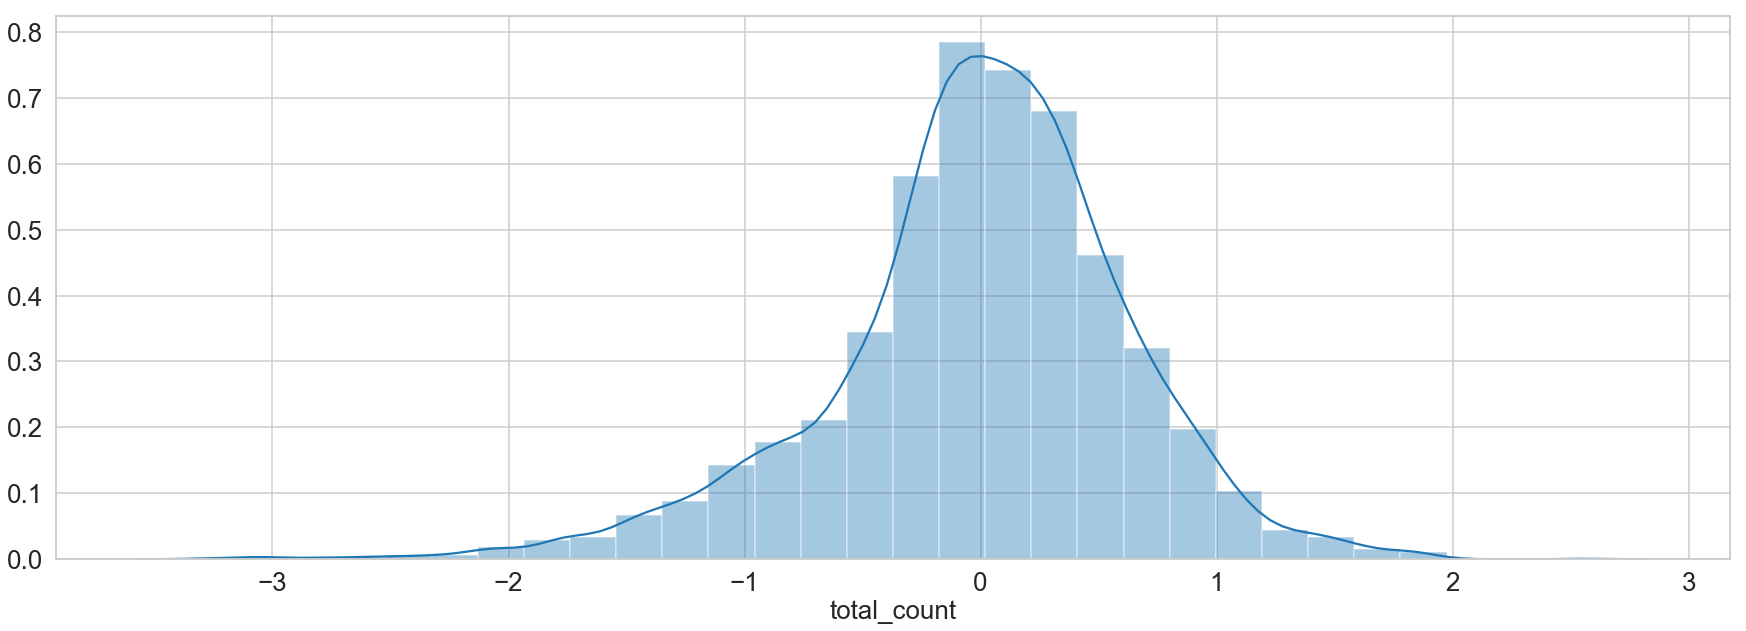

In [51]:
sns.distplot(y_test-predictions,bins=30)

In [52]:
ridge = Ridge(alpha=50)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.30632783 -0.04575041 -0.00048704  0.15228699  0.13366907  0.22382403
  0.23204862 -0.13640506 -0.24191143 -0.34681795 -0.41020532 -0.20726328
  0.03117601  0.23386929  0.363973    0.29460635  0.23205325  0.25382005
  0.28798845  0.28441951  0.26222371  0.27818208  0.32805341  0.41087278
  0.39226517  0.33602271  0.27716039  0.22939459  0.17829191  0.10113353
 -0.02984389 -0.01734149 -0.025926   -0.0160803   0.00051907  0.03681715
  0.02725382 -0.00569012 -0.01190549 -0.15623672 -0.00125945]


In [53]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.35892598 -0.13843627  0.          0.         -0.          0.04544745
  0.12290534 -0.24589692 -0.350345   -0.44801539 -0.51412724 -0.31399693
 -0.070952    0.          0.05930738  0.          0.          0.
  0.          0.          0.          0.          0.00074269  0.08226937
  0.06826561  0.01856708  0.          0.         -0.         -0.01011878
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.         -0.01461533 -0.        ]


In [54]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8229540290190265
0.8191865134482085


In [55]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7102810793880043
0.7012774723547672


In [56]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [57]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(12165, 862)

In [58]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  3.18802648e-01 -7.39031309e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.21965569e-01
 -2.22526458e-01 -3.27275613e-01 -4.34000899e-01 -4.93636389e-01
 -2.89809879e-01 -4.29577397e-02  1.34070211e-01  2.58277993e-01
  1.92410092e-01  1.30620395e-01  1.48456664e-01  1.83477585e-01
  1.76124777e-01  1.52525805e-01  1.70594564e-01  2.17796358e-01
  3.03055205e-01  2.85253172e-01  2.30556774e-01  1.73250339e-01
  1.25459277e-01  7.53889010e-02  0.00000000e+00 -0.00000000e+00
 -6.60937522e-03 -9.63870781e-03 -0.00000000e+00  0.00000000e+00
  3.45521557e-02  0.00000000e+00 -4.96130947e-03 -2.12583160e-03
 -1.32125443e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.19796669e-01 -2.19623664e-02 -2.45059735e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.26015296e-02
 -2.67375070e-02 -1.39478549e-02 -5.94387860e-03 -1.20592113e-02
 -1.07894567

In [59]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9291797259736146
0.922152711046907


In [60]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  2.47754135e-01 -5.69638377e-02 -3.39157769e-03
  2.33210608e-02  1.36335854e-01  8.21494113e-02  2.32529233e-01
 -9.65621304e-02 -1.52777704e-01 -2.10022570e-01 -2.40863743e-01
 -1.37568640e-01 -3.73467143e-03  9.70994344e-02  1.63549330e-01
  1.32628057e-01  1.02140386e-01  1.12590051e-01  1.30721095e-01
  1.27526118e-01  1.18896575e-01  1.27384747e-01  1.50708435e-01
  1.93422465e-01  1.83260519e-01  1.55048565e-01  1.24532932e-01
  9.81480881e-02  7.26406711e-02  2.98202728e-02 -1.58006186e-02
 -8.74967997e-03 -1.65337165e-02  1.96105836e-03 -2.20032375e-03
  1.75273646e-02  1.01411332e-02 -2.59108694e-04 -1.39092695e-03
 -9.17172351e-02 -7.10349364e-04  4.90371867e-02 -9.71705623e-03
 -1.86869400e-02 -1.96376018e-01 -3.32134079e-02 -7.93681942e-03
  6.16809389e-03 -1.20328931e-02 -6.54325287e-03 -8.66254862e-03
 -1.81480951e-02 -9.41858061e-03 -1.59681135e-02 -3.75940252e-02
 -3.32532436e-02 -2.20198023e-02 -1.75919487e-02 -1.82949115e-02
 -1.89705267

In [61]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9479918057840753
0.9408385067123705


In [62]:
predictions=ridge.predict(X_test)
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  0.24178308085625327
MSE=  0.13299019963718114
RMS=  0.36467821382306503


In [63]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

gbmTree on training 0.8540853398654364
gbmTree on test data  0.8395460854336024


In [64]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_test,y_test))
print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9881358666300122
bgcl on test data  0.9216263452504928
out of bag score 0.9165642431489889


In [65]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test,y_test))


rfTree on train data  0.9885323954984488
rfTree on test data  0.922114807195099


In [66]:
predictions=rfTree.predict(X_test)
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  0.28071955013705063
MSE=  0.17507954522963262
RMS=  0.41842507719976896
